## State Space Model Estimation

### Purpose:
The purpose of this notebook is to estimate the state space model proposed in the paper "innovation and production networks, business cycle, and asset pricing"

The basic model takes the form of 
$$\Delta \boldsymbol{a}_t = \boldsymbol{\mu}_t + \boldsymbol{\epsilon}^A_t$$
and 
$$\boldsymbol{\mu}_{t+1} = \boldsymbol{A}\boldsymbol{\mu}_t + \boldsymbol{W}\Delta\boldsymbol{a}_t  + \boldsymbol{\epsilon}^u_t $$

with $\boldsymbol{\epsilon}^A_t \sim \mathbb{N}(0,\boldsymbol{\Sigma}_A),\boldsymbol{\epsilon}^u_t \sim \mathbb{N}(0,\boldsymbol{\Sigma}_u),\boldsymbol{A} = (1-\rho)\boldsymbol{I},\boldsymbol{W} = \boldsymbol{\Lambda}\boldsymbol{\tilde{W}}$

In general cases, we write it as 
$$\boldsymbol{y}_t = \boldsymbol{x}_t + \boldsymbol{\epsilon}^y_t$$
and 
$$\boldsymbol{x}_{t+1} = \boldsymbol{A}\boldsymbol{x}_t + \boldsymbol{W}\boldsymbol{y}_t  + \boldsymbol{\epsilon}^x_t $$

with $\boldsymbol{\epsilon}^y_t \sim \mathbb{N}(0,\boldsymbol{\Sigma}_y),\boldsymbol{\epsilon}^x_t \sim \mathbb{N}(0,\boldsymbol{\Sigma}_x),\boldsymbol{A} = (1-\rho)\boldsymbol{I},\boldsymbol{W} = \boldsymbol{\Lambda}\boldsymbol{\tilde{W}}$, and initial condition $x_0 \sim \mathbb{N}(\mu_0,\Sigma_0)$

## Step 2: EM Estimation
- to estimate the parameters $\Theta = (A,W,\Sigma_x,\Sigma_y;\mu_0,\Sigma_0)$, we use the EM algorithm. Specifically, it takes the following steps, denote 


\begin{equation}
L(X_{0:T-1},\Theta) = log(P(Y_{0:T-1},X_{0:T-1},\Theta))
\end{equation}

#### E-Steps:
- Given the parameters $\Theta_k$ and the observations $Y_{0:T-1}$, we calculate the expectation of

$$E[L(X_{0:T-1},\Theta)|Y_{0:T-1},\Theta_k]$$

#### M-Step
- Update the parameters $\Theta_{k+1}$ as 

$$\Theta_{k+1} = argmax_{\Theta}E[L(X_{0:T-1},\Theta)|Y_{0:T-1},\Theta_k] $$

repeat this process, until it converges


The log likelihood of the joint process is
$$P(Y_{0:T-1},X_{0:T-1},\Theta) = P(x_0)P(y_0|x_0)\prod_{t=0}^{T-2}P(x_{t+1},y_{t+1}|X_{0:t},Y_{0:t})$$
with $P(x_{t+1},y_{t+1}|X_{0:t},Y_{0:t}) = P(y_{t+1}|x_{t+1})P(x_{t+1}|x_t,y_t)$ and 

where
$$\log[P(y_{t}|x_{t})] = \frac{1}{2}\log(|\Sigma_y^{-1}|) - \frac{1}{2}(y_t-x_t)^T\Sigma_y^{-1}(y_t-x_t)$$
and 
$$P(x_{t+1}|x_t,y_t) = \frac{1}{2}\log(|\Sigma_x^{-1}|) - \frac{1}{2}(x_{t+1}-Ax_t - Wy_t)^T\Sigma_x^{-1}(x_{t+1}-Ax_t-Wy_t)$$

Thus, we have 
\begin{equation}
\begin{split}
\log(P(Y_{0:T-1},X_{0:T-1},\Theta)) & = \frac{T}{2}\log(|\Sigma_y^{-1}|) - \frac{1}{2}\sum_{t=0}^{T-1}(y_t-x_t)^T\Sigma_y^{-1}(y_t-x_t) \\
& + \frac{T-1}{2}\log(|\Sigma_x^{-1}|)  - \frac{1}{2}\sum_{t=0}^{T-2}(x_{t+1}-Ax_t - Wy_t)^T\Sigma_x^{-1}(x_{t+1}-Ax_t-Wy_t) \\
& + \frac{1}{2}\log(|\Sigma_0^{-1}|) - \frac{1}{2} (x_0-\mu_0)'\Sigma_0^{-1}(x_0-\mu_0)
\end{split}
\end{equation}


In the following, for simplication, we denote $\mathbb{E}$ as the expectation conditional on all observations (Kalamn Smoother)

Given the parameter at step k, $\Theta_k$, we update $\Theta$ such as 
\begin{equation}
\begin{split}
\Theta_{k+1} & = argmax_{\Theta} \mathbb{E}[log(P(Y_{0:T-1},X_{0:T-1},\Theta))|\Theta_k,Y_{0:T-1}] \\
& = \frac{T}{2}\log(|\Sigma_y^{-1}|) - \frac{1}{2}\sum_{t=0}^{T-1}Tr(\Sigma_y^{-1}\mathbb{E}[(y_t-x_t)(y_t-x_t)^T]) \\
& +  \frac{T-1}{2}\log(|\Sigma_x^{-1}|)  - \frac{1}{2}\sum_{t=0}^{T-2} Tr(\Sigma_x^{-1}\mathbb[(x_{t+1}-Ax_t-Wy_t)(x_{t+1}-Ax_t - Wy_t)^T]) \\
& + \frac{1}{2}\log(|\Sigma_0^{-1}|) - \frac{1}{2}Tr(\Sigma_0^{-1} \mathbb[(x_0-\mu_0)'(x_0-\mu_0)])
\end{split}
\end{equation}


with structure restriction $\Sigma^y = \sigma_A^2\boldsymbol{I}$,$\Sigma^x = \sigma_u^2\boldsymbol{I}$,$Wy_t = \Lambda\tilde{W}_ty_t = \Lambda \tilde{y}_t$, and $A = (1-\rho)\boldsymbol{I}$

First oder condition implies:

\begin{equation}[1]
\frac{\partial L}{\partial \sigma_A^2}: \Sigma_y = \frac{1}{T}\sum_{t=0}^{T-1} \mathbb{E}(y_t - x_t)(y_t-x_t)^T \Rightarrow \sigma^2_A = \frac{1}{JT}\sum_{t=0}^{T-1} Tr[\mathbb{E}(y_t - x_t)(y_t-x_t)^T]
\end{equation}


\begin{equation}[2]
\begin{split}
\frac{\partial L}{\partial \sigma_u^2}: & \\
&\Sigma_x = \frac{1}{T-1}\sum_{t=0}^{T-2} \mathbb{E}[(x_{t+1}-Ax_t-Wy_t)(x_{t+1}-Ax_t - Wy_t)^T] \\
& \Rightarrow \sigma_u^2 = \frac{1}{J(T-1)}\sum_{t=0}^{T-2} Tr[\mathbb{E}((x_{t+1}-Ax_t-Wy_t)(x_{t+1}-Ax_t - Wy_t)^T)]
\end{split}
\end{equation}

Under the restrictions, we have 
\begin{equation}[3]
\begin{split}
\frac{\partial L}{\partial A}: & \\
&\boldsymbol{A} = (\sum_{t=0}^{T-1}\mathbb{E}[(x_{t+1}-Wy_t)x_t^T])(\sum_{t=0}^{T-1}\mathbb{E}[x_tx_t^T])^{-1} \Rightarrow (1-\rho) = \frac{Tr(\sum_{t=0}^{T-1}\mathbb{E}[(x_{t+1}-Wy_t)x_t^T])}{Tr(\sum_{t=0}^{T-1}\mathbb{E}[x_tx_t^T])}
\end{split}
\end{equation}

\begin{equation}[4]
\begin{split}
\frac{\partial L}{\partial \Lambda}: & \\
&\boldsymbol{A} = (\sum_{t=0}^{T-1}\mathbb{E}[(x_{t+1}-Ax_t)\tilde{y}_t^T])(\sum_{t=0}^{T-1}\mathbb{E}[\tilde{y}_t\tilde{y}_t^T])^{-1} \Rightarrow \lambda_i = \frac{(\sum_{t=0}^{T-1}\mathbb{E}[((x_{t+1}-Ax_t)\tilde{y}_t^T])_{ii})}{(\sum_{t=0}^{T-1}\mathbb{E}[\tilde{y}_t\tilde{y}_t^T])_{ii}}
\end{split}
\end{equation}

Estimate initial state mean $\mu_0$
\begin{equation}[5]
\mu_0 = \mathbb{E}[x_0]
\end{equation}

Estimate the initial state covariance
\begin{equation}[6]
\Sigma_0 = \mathbb{E}[(x_0-\mu_0)(x_0-\mu_0)'] = \mathbb{V}(x_0|Y_{0:T})
\end{equation}


Given the smoothed variables $\mathbb{E}[x_t],\mathbb{E}[x_tx_t^T],\text{and}\, \mathbb{E}[x_tx_{t+1}]$, Using the above equations [1-6], we can solve the updated parameters $\Theta_{k+1}$

Also Note that $\mu_0,\Sigma_0,\sigma^2_A$ can be calculated directly, but to estimate $\sigma^2_u,\rho, \text{and} \Lambda$, we need to sovle it iteratively (some code only use the previous value to approximate it, see https://github.com/pykalman/pykalman/blob/master/pykalman/standard.py#L1010 )

To calculate the optimum point, we use Gradient descent method to approximate it

#### Gradient Descent 

For convenience, let us denote 
$$\varphi_a = \sigma_A^{-2},\varphi_u = \sigma^{-2}_u,\varphi_{\rho} = 1-\rho$$, note that, we don't need the Gradient Descent to estimate $\Sigma_A,\mu_0,\Sigma_0$

\begin{equation}
\frac{dL}{d\varphi_a} = \frac{JT}{2 \varphi_a}- \frac{1}{2}\sum_{t=0}^{T-1}Tr[\mathbb{E}((y_t-x_t)(y_t-x_t)^T)]
\end{equation}


\begin{equation}
\frac{dL}{d\varphi_u} = \frac{J(T-1)}{2\varphi_u} -  \frac{1}{2}\sum_{t=0}^{T-2} Tr[\mathbb{E}(x_{t+1}- Ax_t-\Lambda\tilde{W}y_t)(x_{t+1}- Ax_t-\Lambda\tilde{W}y_t)^T]
\end{equation}

\begin{equation}
\frac{d^2L}{d\varphi_a^2} = - \frac{JT}{2\varphi_a^2}
\end{equation}

\begin{equation}
\frac{d^2L}{d\varphi_u^2} = - \frac{J(T-1)}{2\varphi_u^2}
\end{equation}

\begin{equation}
\frac{dL}{d\varphi_{\rho}} =  - \varphi_u\sum_{t=0}^{T-2} Tr[\mathbb{E}((1-\rho)x_tx'_t - (x_{t+1}-\Lambda \tilde{W}y_t)x'_t)]
\end{equation}


\begin{equation}
\frac{d^2L}{d\varphi_{\rho}^2} =  - \varphi_u\sum_{t=0}^{T-2}Tr[\mathbb{E}(x_tx'_t)]
\end{equation}


\begin{equation}
\frac{dL}{d{\lambda_i}} =  \varphi_u \mathbb{E}_T \sum_{t=0}^{T-2}[((x_{t+1}-(1-\rho)x_t)(\tilde{W}y_t)^T)_{ii}-\lambda_i(\tilde{W}y_t)(\tilde{W}y_t)^T_{ii}]
\end{equation}

\begin{equation}
\frac{d^2L}{d{\lambda_i}^2} = -\varphi_u \mathbb{E}_T \sum_{t=0}^{T-2}[(\tilde{W}y_t)i(\tilde{W}y_t)^T_{ii}]
\end{equation}

Estimate the parameters using Newton-Rapson Method to find the optimum, we need to calculate the $-f'/f''$, we also note that 
$\mu_0,\Sigma_0,\text{and} \Sigma_y$ can be directly calculated, to calculate the stepsize,we have

The step size of update for $\varphi_u$
\begin{equation}
d \varphi_u = \varphi_u- \frac{\varphi^2_u}{J(T-1)}\sum_{t=0}^{T-2} Tr[\mathbb{E}(\varphi_{\rho} x_tx'_t - (x_{t+1}-\Lambda \tilde{W}y_t)x'_t)]
\end{equation}

The step size of update for $\varphi_\rho$
\begin{equation}
d \varphi_\rho = \frac{\sum_{t=0}^{T-2}Tr \mathbb{E}[(x_{t+1}-\Lambda \tilde{W}y_t)x'_t)]}{\sum_{t=0}^{T-2}Tr[\mathbb{E}(x_tx'_t)]} - \varphi_\rho
\end{equation}

The step size of update for $\lambda_i$
\begin{equation}
d \lambda_i = \frac{\mathbb{E}_T \sum_{t=0}^{T-2}[(x_{t+1}-\varphi_\rho x_t)_i(\tilde{W}y_t)_i-\lambda_i(\tilde{W}y_t)_i(\tilde{W}y_t)_i]}{\mathbb{E}_T \sum_{t=0}^{T-2}[(\tilde{W}y_t)_i(\tilde{W}y_t)_i]}
\end{equation}

### Kalman Filtration and Smoother

- To use the EM algorithm, each step, we need to know $\mathbb{E}[x_t],\mathbb{E}[x_tx_t'],\mathbb{E}[x_{t+1}x_t']$, which can be obtained using kalman filtration and smoother

We have the following relationship (for details, see the paper - "Innovation and Production Networks, Business Cycle, and Asset Pricing")

#### Kalman Filtration 

- filtered_state_means: $x_{t|t},\forall t \leq T-1$

- predicted_state_means: $x_{t+1|t}, \,\, \forall t \leq T-2$

- predicted_obser_means: $y_{t+1|t}, \,\, \forall t \leq T-2$

- filtered_state_variance: $P_{t|t} = \mathbb{V}[x_t|Y_{0:t}]$

- predicted_state_variance: $P_{t+1|t} = \mathbb{V}[x_{t+1}|Y_{0:t}]$

- predicted_obser_variance: $F_{t+1|t} = P_{t+1|t} + \Sigma_y$

- kalman_gain: $K_{t+1} = P_{t+1|t}F^{-1}_{t+1|t}$

- L: $L_{t|t} = P_{t|t}A'P_{t+1|t}^{-1} , \,\, \forall t \leq T$

- v: $\boldsymbol{v}_{t+1} = y_{t+1} - y_{t+1|t}$

- $x_{t+1|t+1}  = x_{t+1|t} + \boldsymbol{K}_{t+1}\boldsymbol{v}_{t+1}$ 

Conditional on the initial guess of $x_{0|0}$ and $P_{0|0}$, we have recursive relationship

- $x_{t+1|t} = Ax_t + Wy_t$
- $P_{t+1|t} = AP_{t|t}A' + \Sigma_x$
- $y_{t+1|t} = x_{t+1|t}$
- $F_{t+1|t} = P_{t+1|t} + \Sigma_y$
- $K_{t+1} = P_{t+1|t}F_{t+1|t}^{-1}$
- $P_{t+1|t+1} = P_{t+1|t} - K_{t+1}P_{t+1|t}$
- $x_{t+1|t+1} = x_{t+1|t} + K_{t+1}v_{t+1}$
with $v_{t+1} = y_{t+1} - y_{t+1|t}$

Given the filter, we can calculate the kalman smoother

- smoothing_kalman_gain: $L_t = P_{t|t}A^T P_{t+1|t}^{-1}$

- smoothed_state_means: $x_{t|T} = x_{t|t} + L_t(x_{t+1|T}-x_{t+1|t})$

- smoothed_state_covariance: $P_{t|T} = P_{t|t} + L_t(P_{t+1|T}-P_{t+1|t})L_t^T$



1. $\mathbb{E}[x_{t}] = x_{t|T}$
2. $\mathbb{E}[x_{t}x_t'] = x_{t|T}x_{t|T}' + \boldsymbol{P}_{t|T}$
3. $\mathbb{E}[x_{t}x_{t+1}'] = x_{t|T}x_{t+1|T}' + L_tP_{t+1|T}$



#### Likelihood Function
- we calculate the likelihood of the joint $Y_{0:T}$

$likelihood = \log(P(y_0)) + \sum_{t=1}^{T-1} \log(P(y_t|Y_{0:t-1}))$

Note $y_t|Y_{0:t-1} \sim \mathbb{N}(y_{t|t-1},F_{t|t-1})$,$y_0 \sim \mathbb{N}(\mu_0,\Sigma_0)$

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy
from scipy import stats

In [30]:
## Generate a sample
## n_timesteps: the number of periods
## n_state_dims: number of state dimensions (number of sectors)
## n_obs_dims: number of the observations dimensions (number of sectors)
## epsilon_x: the error vector of state variable
## epsilon_y the error vector of the obervable variabel

def _init_parameters(n_state_dims = 2,n_obs_dims = 2,**kwargs):
    
    """
    initialize the parameters
    
    args:
    kwargs:all parameters in the model to estimate, initial_state_mean,initial_state_covariance,epsilon_x,epsilon_y,
    
    
    returns:
    return the parameters 
    
    """
    if n_state_dims != n_obs_dims:
        raise ValueError("the dimension of state and observation should be the same")
        
    params = {}
    params.update(kwargs)
    
    params['sigma_epsilon_x'] = kwargs['sigma_x2']*np.eye(n_state_dims)
    params['sigma_epsilon_y'] = kwargs['sigma_y2']*np.eye(n_obs_dims)
    params['varphi_rho'] = 1- kwargs['rho']
    
    params['A_matrix'] = params['varphi_rho']*np.eye(n_state_dims)
    params['W_tilde_matrix'] = kwargs['W_tilde_matrix']
    params['Lambda_matrix'] = kwargs['Lambda_matrix']
    #params['W_matrix'] = np.dot(params['Lambda_matrix'],params['W_tilde_matrix'])
    
    ## initialize the initial_state_mean, initialize_state_covariance
    if 'initial_state_mean' in kwargs:
        params['initial_state_mean'] = kwargs['initial_state_mean']
    else: 
        params['initial_state_mean'] = np.zeros((n_state_dims,))
    
    if 'initial_state_covariance' in kwargs:
        params['initial_state_covariance'] = kwargs['initial_state_covariance']
    else:
        params['initial_state_covariance'] = np.eye((n_state_dims))
    
    params['n_state_dims'] = n_state_dims
    params['n_obs_dims'] = n_obs_dims
    
    return params

kwargs = {'sigma_x2':1,'sigma_y2':1,'rho':0.5,
         'W_tilde_matrix':np.array([[0.75,0.25],[0.25,0.75]]),
         'Lambda_matrix':0.25*np.eye(2)}

params = _init_parameters(n_state_dim = 2,n_obs_dims = 2,**kwargs)

def generate_sample(n_timesteps = 100,**params):
    
    
    """
    Generate a sample of the model with 'n_timesteps' periods
    """
    
    ### generate errors
    n_state_dims,n_obs_dims = params['n_state_dims'],params['n_obs_dims']
    mean_epsilon_x,mean_epsilon_y = np.zeros((n_state_dims,)),np.zeros((n_obs_dims,))
    sigma_epsilon_x,sigma_epsilon_y = params['sigma_epsilon_x'],params['sigma_epsilon_y']
    epsilon_xs = np.random.multivariate_normal(mean_epsilon_x,sigma_epsilon_x,n_timesteps)
    epsilon_ys = np.random.multivariate_normal(mean_epsilon_y,sigma_epsilon_y,n_timesteps)
    
    ### generate the initial state at period 0
    initial_state_mean,initial_state_covariance = (params['initial_state_mean'],
                                                  params['initial_state_covariance'])
    initial_state = np.random.multivariate_normal(initial_state_mean,initial_state_covariance)
    
    ## generate sample
    states = np.zeros((n_timesteps,n_state_dims))
    observations = np.zeros((n_timesteps,n_obs_dims))
    
    W_matrix = np.dot(params['Lambda_matrix'],params['W_tilde_matrix'])
    
    for t in range(n_timesteps):
        
        if t == 0:
            states[t,:] = initial_state
        else:
            states[t,:] = (np.dot(params['A_matrix'],states[t-1,:])
                        + np.dot(W_matrix,observations[t-1,:])
                            + epsilon_xs[t-1,:])    
        observations[t,:] = states[t,:] + epsilon_ys[t,:]
        

    data = {}      
    data['states'] = states
    data['observations'] = observations
    
    return data

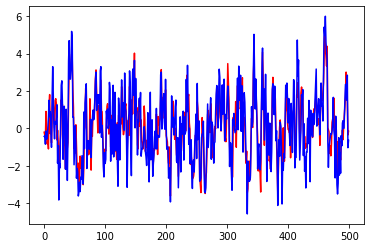

In [33]:
np.random.seed(667)
sample = generate_sample(n_timesteps = 500,**params)
X = sample['states']
Y = sample['observations']

plt.plot(X[:,0],color = 'red')
plt.plot(Y[:,0],color = 'blue')

In [34]:
sum((Y[:,0] - X[:,0])**2/500)

1.0361578108260574

## Estimate Parameters

- step 1: Given the parameters, we calculate the filtered and smoothed state variables

- step 2: Using the Gradient Descent Method to maximize the log-likelihood 

- step 3: calculate the likelihood of the observations to check the likelihood convergence


In [35]:
### Step 1: Kalman Filter and Smoother

def _observation_offsets(observations,time_varying = True,discount = 1.0,**params):
   
    
    #see the corrected version of _observation_offsets(observations,**params) to allowing for time varying W_tilde
    
    """
    calculate the observation offsets which is defined as 
    
    $y_tilde = W_tilde*y_t$
    
    """
    
    n_timesteps,n_obs_dims = observations.shape[0],observations.shape[1]
    observation_offsets = np.zeros((n_timesteps,n_obs_dims))
    for t in range(n_timesteps):
        observation_offsets[t,:] = np.dot(params['W_tilde_matrix'],observations[t,:])
    
    return observation_offsets
    

def _kalman_filter(observations,**params):
    
    """
    take a kalman filtered
    
    args: 
    
    params - a dictionary containing the initial_state_mean, initial_state_covariance, sigma_epsilon_x,sigma_epsilon_y 
    and other parameters needs to be estimated
    
    'initial_state_mean': the mean of the initial_sate
    'initial_state_covariance': the initial state covariance
    'varphi_rho' : 1 - rho
    'A_matrix': varphi_rho*np.eye(n_state_dims)
    'W_tilde_matrix': \tilde{W}
    'Lambda_matrix':\Lambda
    'W_matrix': Lambda_matrix*W_tilde_matrix
    
    returns: 
    
    filtered state mean and covariance 
    
    """
    
    n_timesteps,n_obs_dims = observations.shape[0],observations.shape[1]
    
    if 'n_state_dims' in params:
        n_state_dims = params['n_state_dims']
    else:
        n_state_dims = n_obs_dims
    
    filtered_state_means = np.zeros((n_timesteps,n_state_dims))
    filtered_state_covariances = np.zeros((n_timesteps,n_state_dims,n_state_dims))
    predicted_state_means = np.zeros((n_timesteps,n_state_dims))
    predicted_state_covariances = np.zeros((n_timesteps,n_state_dims,n_state_dims))
    
    predicted_obs_means = np.zeros((n_timesteps,n_obs_dims))
    predicted_obs_covariances = np.zeros((n_timesteps,n_obs_dims,n_obs_dims))
    filtered_kalman_gains = np.zeros((n_timesteps,n_state_dims,n_state_dims))
    
    
    ## calculate the y_tilde
    observation_offsets = params['observation_offsets']

    
    for t in range(n_timesteps):
        
        ## initialize the value at t = 0
        
        if t == 0:
            predicted_state_means[t,:] = params['initial_state_mean']
            predicted_state_covariances[t,:,:] = params['initial_state_covariance']
            #filtered_state_means[t,:] = params['initial_state_mean']
            #filtered_state_covariances[t,:,:] = params['initial_state_covariance']
        
        else:
            predicted_state_means[t,:] = (np.dot(params['A_matrix'],filtered_state_means[t-1,:])
                                   + np.dot(params['Lambda_matrix'],observation_offsets[t-1,:]))
            predicted_state_covariances[t,:,:] = (np.dot(np.dot(params['A_matrix'],
                                                    filtered_state_covariances[t-1,:,:])
                                            ,params['A_matrix'].T) + params['sigma_epsilon_x'])
        
        predicted_obs_means[t,:] = predicted_state_means[t,:]
        predicted_obs_covariances[t,:,:] = (predicted_state_covariances[t,:,:] + 
                                             params['sigma_epsilon_y'])
            
        filtered_kalman_gains[t,:,:] =(np.dot(predicted_state_covariances[t,:,:],
                                               np.linalg.pinv(predicted_obs_covariances[t,:,:])))
        filtered_state_covariances[t,:,:] = (predicted_state_covariances[t,:,:]
                                              - np.dot(filtered_kalman_gains[t,:,:],
                                                      predicted_state_covariances[t,:,:]))
        #filtered_state_means[t,:] = (predicted_state_means[t,:] + 
                                      #np.dot(filtered_state_covariances[t,:,:],
                                             #observations[t,:] - predicted_obs_means[t,:]))                                    #observations[t,:] - predicted_obs_means[t,:]))
        filtered_state_means[t,:] = (predicted_state_means[t,:] + 
                                      np.dot(filtered_kalman_gains[t,:,:],
                                             observations[t,:] - predicted_obs_means[t,:])) 
        
    predicted = {'predicted_obs_means':predicted_obs_means,
                    'predicted_obs_covariances':predicted_obs_covariances,
                    'predicted_state_means':predicted_state_means,
                    'predicted_state_covariances':predicted_state_covariances}
    filtered = {'filtered_state_means':filtered_state_means,
                   'filtered_state_covariances':filtered_state_covariances,
                   'filtered_kalman_gains':filtered_kalman_gains}
        
    return filtered,predicted


def _kalman_smoother(observations,**params):
    
    """
    take a kalman smoother
    
    args: 
    
    params - a dictionary containing the initial_state_mean, initial_state_covariance, sigma_epsilon_x,sigma_epsilon_y 
    and other parameters needs to be estimated
    
    'initial_state_mean': the mean of the initial_sate
    'initial_state_covariance': the initial state covariance
    'varphi_rho': 1 - rho
    'A_matrix': varphi_rho*np.eye(n_state_dims)
    'W_tilde_matrix': \tilde{W}
    'Lambda_matrix':\Lambda
    'W_matrix': Lambda_matrix*W_tilde_matrix
    
    returns: 
    
    smoothed state mean and covariance 
    
    """
    
    filtered,predicted = _kalman_filter(observations,**params)
    
    filtered_state_covariances = filtered['filtered_state_covariances']
    filtered_state_means = filtered['filtered_state_means']
    filtered_kalman_gains = filtered['filtered_kalman_gains']
    predicted_state_means = predicted['predicted_state_means']
    predicted_state_covariances = predicted['predicted_state_covariances']
    predicted_obs_means = predicted['predicted_obs_means']
    predicted_obs_covariances = predicted['predicted_obs_covariances']
    
    n_timesteps,n_obs_dims = observations.shape[0],observations.shape[1]
    n_state_dims = n_obs_dims if 'n_state_dims' not in params else params['n_state_dims']
    
    smoothed_state_covariances = np.zeros((n_timesteps,n_state_dims,n_state_dims))
    smoothed_state_means = np.zeros((n_timesteps,n_state_dims))
    smoothed_kalman_gains = np.zeros((n_timesteps,n_state_dims,n_state_dims))
    
    smoothed_state_covariances[-1,:,:] = filtered_state_covariances[-1,:,:]
    smoothed_state_means[-1,:] = filtered_state_means[-1,:]
    
    
    for t in reversed(range(n_timesteps-1)):
        
        smoothed_kalman_gains[t,:,:] = (np.dot(np.dot(filtered_state_covariances[t,:,:],
                                          params['A_matrix'].T),
                                    np.linalg.pinv(predicted_state_covariances[t+1,:,:])))
        smoothed_state_means[t,:] = (filtered_state_means[t,:]
                                     + np.dot(smoothed_kalman_gains[t,:,:],
                                          smoothed_state_means[t+1,:] - predicted_state_means[t+1,:]))
        smoothed_state_covariances[t,:,:] = (filtered_state_covariances[t,:,:] 
                                            + np.dot(smoothed_kalman_gains[t,:,:],
                                                    np.dot(smoothed_state_covariances[t+1,:,:]
                                                          - predicted_state_covariances[t+1,:,:],
                                                        smoothed_kalman_gains[t,:,:].T)))
    smoothed = {'smoothed_kalman_gains':smoothed_kalman_gains,
               'smoothed_state_means':smoothed_state_means,
               'smoothed_state_covariances':smoothed_state_covariances}
    
    predicted = {'predicted_obs_means':predicted_obs_means,
                    'predicted_obs_covariances':predicted_obs_covariances}
    filtered = {'filtered_state_means':filtered_state_means,
                   'filtered_state_covariances':filtered_state_covariances,
               'filtered_kalman_gains':filtered_kalman_gains}    
    
    return smoothed,predicted,filtered

In [36]:
### calcalute the E[x_tx_t'] and E[x_{t+1}x_t']
def _smoothed_state_squares(smoothed_state_means,smoothed_state_covariances):
    
    """
    calculate the E[x_tx_t']
    $\mathbb{E}[x_{t}x_t'] = x_{t|T}x_{t|T}' + \boldsymbol{P}_{t|T}$
    
    """
    
    n_timesteps,n_state_dims = smoothed_state_means.shape[0],smoothed_state_means.shape[1]
    smoothed_state_squares = np.zeros((n_timesteps,n_state_dims,n_state_dims))
    for t in range(n_timesteps):
                                      
        smoothed_state_squares[t,:,:] = (np.outer(smoothed_state_means[t,:],
                                                 smoothed_state_means[t,:]) 
                                        + smoothed_state_covariances[t,:,:])
    return smoothed_state_squares

def _smoothed_state_pairs(smoothed_state_means,smoothed_state_covariances,smoothed_kalman_gains):
    
    """
    calculate the smoothed Cov[x_{t+1},x_t']
    $\mathbb{Cov}[x_{t+1},x_{t}] = P_{t+1|T}L_t'$
    """
    n_timesteps,n_state_dims = smoothed_state_means.shape[0],smoothed_state_means.shape[1]
    smoothed_state_pairs = np.zeros((n_timesteps,n_state_dims,n_state_dims))
    
    for t in range(n_timesteps-1):
        smoothed_state_pairs[t+1,:,:] = (np.dot(smoothed_state_covariances[t+1,:,:],
                                                smoothed_kalman_gains[t,:,:].T))
    return smoothed_state_pairs

## Given the kalman smoother and filtered, we can calculate the likelihood of the observations
def _loglikelihoods(observations,predicted_obs_means,predicted_obs_covariances):
    
    
    """
    args:
    observations: np.array,the observations
    predicted_obs_means: the n_timesteps x n_obs_dims records the predicted observation means
    predicted_obs_covariances: the n_timesteps x n_obs_dims records the predicted observation covariances
    calculate the loglikelihood of the observations
    """
    
    n_timesteps = observations.shape[0]
    loglikelihoods = np.zeros((n_timesteps,))
    for t in range(n_timesteps):
        tmp = stats.multivariate_normal.pdf(observations[t,:],
                                           mean = predicted_obs_means[t,:],
                                          cov = predicted_obs_covariances[t,:,:])
        loglikelihoods[t] = np.log(tmp)
    return loglikelihoods.sum()





### Estimate Parameters
def _em_estimate_LL1(observations,smoothed_state_means
                    ,smoothed_state_covariances):
    
    """
    calculate \sum_{t=0}^{T-1} [\mathbb{E}(y_t - x_t)(y_t-x_t)^T]
    
    """
    n_timesteps,n_obs_dims = (observations.shape[0],observations.shape[1])
    n_state_dims = smoothed_state_means.shape[1]
    res = np.zeros((n_obs_dims,n_obs_dims))
    
    for t in range(n_timesteps):
        err = observations[t,:] - smoothed_state_means[t,:]
        res += (np.outer(err,err) + 
                smoothed_state_covariances[t,:,:])
    return res


def _em_estimate_sigma_y2(observations,smoothed_state_means,
                         smoothed_state_covariances):
    
    """
    we can estimate sigma^2_A directly:
    \sigma^2_A = \frac{1}{JT}\sum_{t=0}^{T-1} Tr[\mathbb{E}(y_t - x_t)(y_t-x_t)^T]
    """
    
    n_timesteps,n_obs_dims = (observations.shape[0],observations.shape[1])
    LL1 = (_em_estimate_LL1(observations,smoothed_state_means
                    ,smoothed_state_covariances))
    
    sigma_y2 = (np.trace(LL1))/(n_timesteps*n_obs_dims)
    return sigma_y2


def _em_estimate_initial_state_mean(smoothed_state_means):
    
    """
    the initial state mean can be calculated as 
    $\mu_0 = \mathbb{E}[x_0]$
    """
    
    n_state_dims = smoothed_state_means.shape[1]
    #return np.zeros((n_state_dims,))
    return smoothed_state_means[0,:]


def _em_estimate_initial_state_covariance(smoothed_state_covariances):
    
    """
    \Sigma_0 = P_{0|T}
    """
    
    n_state_dims = smoothed_state_covariances.shape[1]
    #return np.eye(n_state_dims)
    return smoothed_state_covariances[0,:]


def _em_estimate_LL2(observations,smoothed_state_means,smoothed_state_covariances,
                         smoothed_state_pairs,**params):
    
    """
    Calculate the term 
    \sum_{t=0}^{T-2} [\mathbb{E}((x_{t+1}-Ax_t-Wy_t)(x_{t+1}-Ax_t - Wy_t)^T)]
    """
    
    ## obtain the y_tilde
    observation_offsets = params['observation_offsets']
    
    n_timesteps,n_state_dims = smoothed_state_means.shape[0],smoothed_state_means.shape[1]
    
    res = np.zeros((n_state_dims,n_state_dims))
    A_matrix = params['A_matrix']
    Lambda_matrix = params['Lambda_matrix']
    
    for t in range(n_timesteps-1):
        
        errs = (smoothed_state_means[t+1,:] - 
               np.dot(A_matrix,smoothed_state_means[t,:])
               - np.dot(Lambda_matrix,observation_offsets[t,:]))
        
        res += (np.outer(errs,errs) 
               + smoothed_state_covariances[t+1,:,:] +
               np.dot(A_matrix,np.dot(smoothed_state_covariances[t,:,:],A_matrix.T))
               - np.dot(smoothed_state_pairs[t+1,:],A_matrix.T)
               - np.dot(A_matrix,smoothed_state_pairs[t+1,:].T))
    return res 


def _em_estimate_sigma_x2(observations,smoothed_state_means,smoothed_state_covariances,
                         smoothed_state_pairs,**params):
    
    """
    
    $\sigma_u^2 = \frac{1}{J(T-1)}\sum_{t=0}^{T-2} Tr[\mathbb{E}((x_{t+1}-Ax_t-Wy_t)(x_{t+1}-Ax_t - Wy_t)^T)]$
    
    """
    
    n_timesteps,n_state_dims = smoothed_state_means.shape[0],smoothed_state_means.shape[1]
    LL2 = _em_estimate_LL2(observations,smoothed_state_means,smoothed_state_covariances,
                         smoothed_state_pairs,**params)
    
    sigma_x2 = np.trace(LL2)/((n_timesteps-1)*n_state_dims)
    
    return sigma_x2


def _em_estimate_varphi_rho(observations,
                           smoothed_state_means,smoothed_state_covariances,smoothed_state_pairs,
                           **params):
    
    """
    Here, we estimate the varphi_rho using the parameters in last iterations, which maybe not accurate.
    
    to get an accurate solution, we need to use the GD method to find the option within the iterations
    
    (1-\rho) = \frac{Tr(\sum_{t=0}^{T-2}\mathbb{E}[(x_{t+1}-Wy_t)x_t^T])}{Tr(\sum_{t=0}^{T-2}\mathbb{E}[x_tx_t^T])}
    
    """
    n_timesteps,n_state_dims = smoothed_state_means.shape[0],smoothed_state_means.shape[1]
    res1,res2 = np.zeros((n_state_dims,n_state_dims)),np.zeros((n_state_dims,n_state_dims))
    observation_offsets = params['observation_offsets']
    
    Lambda_matrix = params['Lambda_matrix']
    
    for t in range(n_timesteps-1):
        errs = (smoothed_state_means[t+1,:] - np.dot(Lambda_matrix,observation_offsets[t,:]))
        res1 += (np.outer(errs,smoothed_state_means[t,:]) + smoothed_state_pairs[t+1,:,:] )
        
        res2 +=(np.outer(smoothed_state_means[t,:],smoothed_state_means[t,:])
               + smoothed_state_covariances[t,:,:])    
    res1 = np.trace(res1)
    res2 = np.trace(res2)
    
    varphi_rho = res1/res2
    
    return varphi_rho

def _em_update_varphi_rho(observations,
                          smoothed_state_means,smoothed_state_covariances,smoothed_state_pairs,
                         **params):
    
    """
    We use the Gradient Descent Method to update the parameters to coverge to the optimum within each M-step
    """
    observation_offsets = params['observation_offsets']
    varphi_rho_step = (_em_estimate_varphi_rho(observations,
                          smoothed_state_means,smoothed_state_covariances,smoothed_state_pairs,
                           **params) - params['varphi_rho'])
    
    return varphi_rho_step



def _em_estimate_Lambda(smoothed_state_means,**params):
    
    """
    \lambda_i = \frac{(\sum_{t=0}^{T-2}\mathbb{E}[((x_{t+1}-Ax_t)\tilde{y}_t^T])_{ii})}
    {(\sum_{t=0}^{T-2}\mathbb{E}[\tilde{y}_t\tilde{y}_t^T])_{ii}}
    
    """
    
    A_matrix = params['A_matrix']
    n_timesteps,n_state_dims = smoothed_state_means.shape[0],smoothed_state_means.shape[1]
    
    res1 = np.zeros((n_state_dims,n_state_dims))
    res2 = np.zeros((n_state_dims,n_state_dims))
    observation_offsets = params['observation_offsets']
    
    for t in range(n_timesteps-1):
        errs = (smoothed_state_means[t+1,:]
               - np.dot(A_matrix,smoothed_state_means[t,:]))
        res1 += (np.outer(errs,
                         observation_offsets[t,:]))
        res2 += (np.outer(observation_offsets[t,:],
                         observation_offsets[t,:]))
        
    
    
    res1 = np.diag(res1)
    res2 = np.diag(res2)
    
    return np.diag(res1/res2)

def _em_update_Lambda(smoothed_state_means,**params):
    
    """
    We use the Gradient Descent Method to update the parameters to coverge to the optimum within each M-step
    """
    Lambda_step = (_em_estimate_Lambda(smoothed_state_means,**params)
                  - params['Lambda_matrix'])
    
    return Lambda_step

def _smoothed_loglikelihood(observations,smoothed_state_means,smoothed_state_covariances,
                            smoothed_state_pairs,**params):
    
    """
    Here, we also calculate the smoothed loglikelihoods of the joint probability.
    
    Given the smoothed, the smoothed loglikelihoods will increase 
    within each M-steps if we use the Gradient-Descent Method
    """
    
    n_timesteps,n_obs_dims = observations.shape[0],observations.shape[1]
    n_state_dims = smoothed_state_means.shape[1]
    
    LL1 = _em_estimate_LL1(observations,smoothed_state_means
                    ,smoothed_state_covariances)
    LL2 = _em_estimate_LL2(observations,smoothed_state_means,smoothed_state_covariances,
                         smoothed_state_pairs,**params)
    
    sigma_x2 = params['sigma_x2']
    sigma_y2 = params['sigma_y2']
    ## summation all terms
    LL1 = (-0.5*n_timesteps*n_obs_dims*np.log(sigma_y2)
          - 0.5*np.trace(LL1)/(sigma_y2))
    LL2 = (-0.5*(n_timesteps-1)*n_state_dims*np.log(sigma_x2)
          -0.5*np.trace(LL2)/(sigma_x2))
    
    
    ##
    initial_state_mean = params['initial_state_mean']
    initial_state_covariance = params['initial_state_covariance']
    
    err = (smoothed_state_means[0,:] - initial_state_mean)
    tmp = (np.outer(err,err) + smoothed_state_covariances[0,:,:]) 
    LL3 = (np.dot(np.linalg.pinv(initial_state_covariance),tmp))
    LL3 = (-0.5*np.linalg.det(initial_state_covariance)
          -0.5*np.trace(LL3))
    
    return LL1 + LL2 + LL3
    

In [37]:
### update params

def _update_params(new_sigma_y2,new_initial_state_mean,
                  new_initial_state_covariance,new_sigma_x2,new_varphi_rho,
                  new_Lambda,**params):
    
    if new_sigma_y2 is not None:
        params['sigma_y2'] = new_sigma_y2
        params['sigma_epsilon_y'] = new_sigma_y2*np.eye(params['n_obs_dims'])
    if new_initial_state_mean is not None:
        params['initial_state_mean'] = new_initial_state_mean
    if new_initial_state_covariance is not None:
        params['initial_state_covariance'] = new_initial_state_covariance
    if new_sigma_x2 is not None:
        params['sigma_x2'] = new_sigma_x2
        params['sigma_epsilon_x'] = new_sigma_x2*np.eye(params['n_state_dims'])
    if new_varphi_rho is not None:
        params['varphi_rho'] = new_varphi_rho
        params['rho'] = 1 - new_varphi_rho
        params['A_matrix'] = new_varphi_rho*np.eye(params['n_state_dims'])
    if new_Lambda is not None:
        params['Lambda_matrix'] = new_Lambda
    
    return params

In [38]:
def _em_estimate(observations,learning_rate = 0.01,tol = 1e-5,method = 'v1'
                 ,SGD = True,**params):
    
    
    """
    use the em algorithm to estimate the parameters
    """
    
    _,predicted,_ = _kalman_smoother(observations,**params)
    predicted_obs_means = predicted['predicted_obs_means']
    predicted_obs_covariances = predicted['predicted_obs_covariances']
    
    ll0 = 0 
    ll1 = 1
    
    ## check which method used in M-step
    if method == 'v1':
        M_method = _em_M_step_v1
    else:
        M_method = _em_M_step_v2
    
    n_iters = 0
    
    while np.abs(ll1-ll0) > tol:
        
    
        
        ll0 = _loglikelihoods(observations,predicted_obs_means,predicted_obs_covariances)
        #params = _em_M_step_v2(observations,learning_rate = learning_rate,tol = tol,**params)
        params = M_method(observations,learning_rate = learning_rate,tol = tol,SGD = SGD,
                          **params)
        
        
        _,predicted,_ = _kalman_smoother(observations,**params)
        predicted_obs_means = predicted['predicted_obs_means']
        predicted_obs_covariances = predicted['predicted_obs_covariances']
        
        ll1 = _loglikelihoods(observations,predicted_obs_means,predicted_obs_covariances)
        
        n_iters += 1
        print("the loglikelihood of the observations" +
              "at iteration {} is: {}".format(n_iters,ll1))
        print('sigma_x2:',params['sigma_x2'],'sigma_y2:',params['sigma_y2'])     
    return params


def _em_M_step_v1(observations,learning_rate = None,tol = None,SGD = True,**params):
    
    """
    In the M step, given the observations and params, we find the optimum params in next steps
    we do not optimize within the M step exactly
    """
    
    smoothed,predicted,filtered = _kalman_smoother(observations,**params)

    smoothed_state_means,smoothed_state_covariances = (smoothed['smoothed_state_means'],
                                                   smoothed['smoothed_state_covariances'])
    smoothed_kalman_gains = smoothed['smoothed_kalman_gains']
    smoothed_state_pairs = _smoothed_state_pairs(smoothed_state_means,smoothed_state_covariances,
                                                 smoothed_kalman_gains)
    observation_offsets = params['observation_offsets']
    predicted_obs_means = predicted['predicted_obs_means']
    predicted_obs_covariances = predicted['predicted_obs_covariances']
    
      ## sigma_y2,initial_state_mean and initial_state_covariance can be directly estimated
    sigma_y2 = _em_estimate_sigma_y2(observations,smoothed_state_means,
                         smoothed_state_covariances)
    initial_state_mean = _em_estimate_initial_state_mean(smoothed_state_means)
    initial_state_covariance = _em_estimate_initial_state_covariance(smoothed_state_covariances)
        
    
    varphi_rho = _em_estimate_varphi_rho(observations,
                           smoothed_state_means,smoothed_state_covariances,smoothed_state_pairs,
                           **params)
    Lambda = _em_estimate_Lambda(smoothed_state_means,**params)    
    sigma_x2 = _em_estimate_sigma_x2(observations,smoothed_state_means,smoothed_state_covariances,
                         smoothed_state_pairs,**params)

    params = _update_params(new_sigma_y2 = sigma_y2,new_initial_state_mean = initial_state_mean,
               new_initial_state_covariance = initial_state_covariance,new_sigma_x2 = sigma_x2,
                        new_varphi_rho = varphi_rho,new_Lambda = Lambda,**params)

    return params  
    
    

def _em_M_step_v2(observations,learning_rate = 0.01,tol = 1e-4,SGD = True,**params):
    
    
    """
    In the M step, given the observations and params, we find the optimum params in next steps
    """
    
    n_state_dims = params['n_state_dims']
    smoothed,predicted,filtered = _kalman_smoother(observations,**params)

    smoothed_state_means,smoothed_state_covariances = (smoothed['smoothed_state_means'],
                                                   smoothed['smoothed_state_covariances'])
    smoothed_kalman_gains = smoothed['smoothed_kalman_gains']
    smoothed_state_pairs = _smoothed_state_pairs(smoothed_state_means,smoothed_state_covariances,
                                                 smoothed_kalman_gains)
    observation_offsets = params['observation_offsets']
    predicted_obs_means = predicted['predicted_obs_means']
    predicted_obs_covariances = predicted['predicted_obs_covariances']
    
    ll0 = 0 
    ll1 = 1
    

    ## sigma_y2,initial_state_mean and initial_state_covariance can be directly estimated
    sigma_y2 = _em_estimate_sigma_y2(observations,smoothed_state_means,
                         smoothed_state_covariances)
    initial_state_mean = _em_estimate_initial_state_mean(smoothed_state_means)
    initial_state_covariance = _em_estimate_initial_state_covariance(smoothed_state_covariances)
        
    n_iters = 0
    
    while np.abs(ll1-ll0) > tol:
        
        ll0 = _smoothed_loglikelihood(observations,smoothed_state_means,smoothed_state_covariances,
                            smoothed_state_pairs,**params)
    
        varphi_rho_step = _em_update_varphi_rho(observations,
                           smoothed_state_means,smoothed_state_covariances,smoothed_state_pairs,
                           **params)
        Lambda_step = _em_update_Lambda(smoothed_state_means,**params)
        
        if SGD == True:
            varphi_rho = (params['varphi_rho'] + learning_rate*(varphi_rho_step + 
                                                           np.random.normal(0,5*np.abs(varphi_rho_step))))
            tmp = np.random.multivariate_normal(np.zeros((n_state_dims,)),
                                                5.0*scipy.linalg.norm(Lambda_step)*np.eye(n_state_dims))
            Lambda = (params['Lambda_matrix'] + learning_rate*(Lambda_step + 
                                                          np.diag(tmp)))
        else:
            varphi_rho = (params['varphi_rho'] + learning_rate*varphi_rho_step)
            Lambda = (params['Lambda_matrix'] + learning_rate*Lambda_step)
        
        sigma_x2 = _em_estimate_sigma_x2(observations,smoothed_state_means,smoothed_state_covariances,
                         smoothed_state_pairs,**params)

        params = _update_params(new_sigma_y2 = sigma_y2,new_initial_state_mean = initial_state_mean,
               new_initial_state_covariance = initial_state_covariance,new_sigma_x2 = sigma_x2,
                        new_varphi_rho = varphi_rho,new_Lambda = Lambda,**params)
        ll1 = _smoothed_loglikelihood(observations,smoothed_state_means,smoothed_state_covariances,
                            smoothed_state_pairs,**params)
        
        n_iters += 1
        #print("the smoothed loglikelihood at iteration {} are: {}{}{}{}".format(n_iters,'ll0: ',ll0,'ll1: ',ll1))
        
    return params

In [39]:
observations = sample['observations']
states = sample['states']

In [40]:
params['observation_offsets'] = _observation_offsets(observations,
                                                      time_varying = True,
                                                      discount = 1.0,**params)

In [ ]:
params1 = _em_estimate(observations,learning_rate = 1,tol = 1e-4,method = 'v2',SGD = False,**params)

the loglikelihood of the observationsat iteration 1 is: -1787.3697317460833
sigma_x2: 1.0067411496588952 sigma_y2: 0.9758232611920044
the loglikelihood of the observationsat iteration 2 is: -1786.674869898262
sigma_x2: 1.0162141040640773 sigma_y2: 0.9626074104651428
the loglikelihood of the observationsat iteration 3 is: -1786.2378602426156
sigma_x2: 1.0273552641739505 sigma_y2: 0.9541688739588351
the loglikelihood of the observationsat iteration 4 is: -1785.9210687185687
sigma_x2: 1.0389716182914364 sigma_y2: 0.9477503993920489
the loglikelihood of the observationsat iteration 5 is: -1785.67854882437
sigma_x2: 1.0503554169037626 sigma_y2: 0.9421629225485083
the loglikelihood of the observationsat iteration 6 is: -1785.4877791663585
sigma_x2: 1.0612505365544576 sigma_y2: 0.9368695646957942
the loglikelihood of the observationsat iteration 7 is: -1785.3367286433977
sigma_x2: 1.0715350680920768 sigma_y2: 0.9316784274126935
the loglikelihood of the observationsat iteration 8 is: -1785.213

the loglikelihood of the observationsat iteration 63 is: -1783.7380629861568
sigma_x2: 1.3370608347183335 sigma_y2: 0.6965116219097645
the loglikelihood of the observationsat iteration 64 is: -1783.7255429315205
sigma_x2: 1.3400171974184074 sigma_y2: 0.6935369814724976
the loglikelihood of the observationsat iteration 65 is: -1783.7134331432374
sigma_x2: 1.3430338046215184 sigma_y2: 0.6905692145473733
the loglikelihood of the observationsat iteration 66 is: -1783.7016442584018
sigma_x2: 1.3459567998933706 sigma_y2: 0.6876474208586351
the loglikelihood of the observationsat iteration 67 is: -1783.690124883246
sigma_x2: 1.3488167093646162 sigma_y2: 0.6847725549256897
the loglikelihood of the observationsat iteration 68 is: -1783.6783636103896
sigma_x2: 1.3516282819119785 sigma_y2: 0.6819427695951761
the loglikelihood of the observationsat iteration 69 is: -1783.6670358056754
sigma_x2: 1.3545394340434653 sigma_y2: 0.6791083355573344
the loglikelihood of the observationsat iteration 70 is:

the loglikelihood of the observationsat iteration 124 is: -1783.2560912114775
sigma_x2: 1.4730497081015794 sigma_y2: 0.5627964293258743
the loglikelihood of the observationsat iteration 125 is: -1783.2511720812718
sigma_x2: 1.474700778421455 sigma_y2: 0.561207649822991
the loglikelihood of the observationsat iteration 126 is: -1783.2463103014168
sigma_x2: 1.4763394288808236 sigma_y2: 0.5596318818405962
the loglikelihood of the observationsat iteration 127 is: -1783.2415048074981
sigma_x2: 1.477965820376245 sigma_y2: 0.5580689293874427
the loglikelihood of the observationsat iteration 128 is: -1783.2367545597563
sigma_x2: 1.479580110313872 sigma_y2: 0.5565186024910254
the loglikelihood of the observationsat iteration 129 is: -1783.2320585423795
sigma_x2: 1.4811824529012363 sigma_y2: 0.5549807165647676
the loglikelihood of the observationsat iteration 130 is: -1783.227415762831
sigma_x2: 1.4827729993846823 sigma_y2: 0.5534550918918316
the loglikelihood of the observationsat iteration 131

the loglikelihood of the observationsat iteration 185 is: -1783.0324289025934
sigma_x2: 1.555655028988821 sigma_y2: 0.4843913254969594
the loglikelihood of the observationsat iteration 186 is: -1783.0296893697127
sigma_x2: 1.5567673198474192 sigma_y2: 0.48334807889568854
the loglikelihood of the observationsat iteration 187 is: -1783.0269708902404
sigma_x2: 1.557873526541349 sigma_y2: 0.48231080836575835
the loglikelihood of the observationsat iteration 188 is: -1783.0242731639048
sigma_x2: 1.5589737132671628 sigma_y2: 0.481279447358083
the loglikelihood of the observationsat iteration 189 is: -1783.0215958958759
sigma_x2: 1.5600679433374423 sigma_y2: 0.48025393031767916
the loglikelihood of the observationsat iteration 190 is: -1783.0189387966439
sigma_x2: 1.5611562791948523 sigma_y2: 0.47923419266562733
the loglikelihood of the observationsat iteration 191 is: -1783.0163015819053
sigma_x2: 1.5622387824259765 sigma_y2: 0.47822017078139856
the loglikelihood of the observationsat iterat

the loglikelihood of the observationsat iteration 246 is: -1782.8953050388386
sigma_x2: 1.6142920907157827 sigma_y2: 0.4297233544039566
the loglikelihood of the observationsat iteration 247 is: -1782.8934479970562
sigma_x2: 1.6151250502391317 sigma_y2: 0.42895104992870503
the loglikelihood of the observationsat iteration 248 is: -1782.8916005390379
sigma_x2: 1.615954627669624 sigma_y2: 0.42818198570245386
the loglikelihood of the observationsat iteration 249 is: -1782.8897625540826
sigma_x2: 1.6167808522615723 sigma_y2: 0.42741613280027435
the loglikelihood of the observationsat iteration 250 is: -1782.8879339330883
sigma_x2: 1.6176037529244705 sigma_y2: 0.4266534626521131
the loglikelihood of the observationsat iteration 251 is: -1782.886114568528
sigma_x2: 1.618423358227971 sigma_y2: 0.4258939470373653
the loglikelihood of the observationsat iteration 252 is: -1782.884304354418
sigma_x2: 1.6192396964067757 sigma_y2: 0.4251375580795446
the loglikelihood of the observationsat iteration

the loglikelihood of the observationsat iteration 307 is: -1782.7962726997384
sigma_x2: 1.659811903336531 sigma_y2: 0.38765903789610695
the loglikelihood of the observationsat iteration 308 is: -1782.7948432645912
sigma_x2: 1.6604818578053875 sigma_y2: 0.387041886266264
the loglikelihood of the observationsat iteration 309 is: -1782.7934188041331
sigma_x2: 1.6611497271534603 sigma_y2: 0.3864267060256126
the loglikelihood of the observationsat iteration 310 is: -1782.7919992687887
sigma_x2: 1.6618155263690582 sigma_y2: 0.38581348267216975
the loglikelihood of the observationsat iteration 311 is: -1782.7905846095664
sigma_x2: 1.6624792702896376 sigma_y2: 0.3852022018535803
the loglikelihood of the observationsat iteration 312 is: -1782.789174778051
sigma_x2: 1.6631409736036884 sigma_y2: 0.3845928493651892
the loglikelihood of the observationsat iteration 313 is: -1782.7877697263928
sigma_x2: 1.6638006508525727 sigma_y2: 0.38398541114814144
the loglikelihood of the observationsat iteratio

the loglikelihood of the observationsat iteration 368 is: -1782.7166569954065
sigma_x2: 1.697333886286194 sigma_y2: 0.3531665719242513
the loglikelihood of the observationsat iteration 369 is: -1782.7154575376942
sigma_x2: 1.6978994863230998 sigma_y2: 0.3526476675066779
the loglikelihood of the observationsat iteration 370 is: -1782.714260850865
sigma_x2: 1.6984636949877825 sigma_y2: 0.3521300672067331
the loglikelihood of the observationsat iteration 371 is: -1782.7130669092721
sigma_x2: 1.6990265207064381 sigma_y2: 0.3516137629706866
the loglikelihood of the observationsat iteration 372 is: -1782.7118756875195
sigma_x2: 1.6995879718313218 sigma_y2: 0.3510987468167191
the loglikelihood of the observationsat iteration 373 is: -1782.7106871604576
sigma_x2: 1.7001480566415446 sigma_y2: 0.3505850108341274
the loglikelihood of the observationsat iteration 374 is: -1782.7095013031812
sigma_x2: 1.7007067833438603 sigma_y2: 0.3500725471825453
the loglikelihood of the observationsat iteration 

the loglikelihood of the observationsat iteration 429 is: -1782.6477517834821
sigma_x2: 1.7295581811120648 sigma_y2: 0.3236434131427935
the loglikelihood of the observationsat iteration 430 is: -1782.646682008397
sigma_x2: 1.7300520285145913 sigma_y2: 0.32319155046733705
the loglikelihood of the observationsat iteration 431 is: -1782.6456138041092
sigma_x2: 1.730544887330185 sigma_y2: 0.32274060835558965
the loglikelihood of the observationsat iteration 432 is: -1782.6445471557927
sigma_x2: 1.7310367626292342 sigma_y2: 0.3222905819981827
the loglikelihood of the observationsat iteration 433 is: -1782.6434820487402
sigma_x2: 1.7315276594423459 sigma_y2: 0.3218414666239591
the loglikelihood of the observationsat iteration 434 is: -1782.642418468366
sigma_x2: 1.7320175827607163 sigma_y2: 0.32139325749960324
the loglikelihood of the observationsat iteration 435 is: -1782.6413564002023
sigma_x2: 1.7325065375365036 sigma_y2: 0.32094594992927866
the loglikelihood of the observationsat iterati

the loglikelihood of the observationsat iteration 490 is: -1782.5848925430362
sigma_x2: 1.758037500986189 sigma_y2: 0.2976093017214406
the loglikelihood of the observationsat iteration 491 is: -1782.5838952055678
sigma_x2: 1.7584790650179878 sigma_y2: 0.2972059983644155
the loglikelihood of the observationsat iteration 492 is: -1782.582898715836
sigma_x2: 1.7589198885352484 sigma_y2: 0.29680338083703023
the loglikelihood of the observationsat iteration 493 is: -1782.5819030644784
sigma_x2: 1.7593599747400805 sigma_y2: 0.29640144611697744
the loglikelihood of the observationsat iteration 494 is: -1782.5809082421968
sigma_x2: 1.7597993268115482 sigma_y2: 0.296000191203892
the loglikelihood of the observationsat iteration 495 is: -1782.5799142397573
sigma_x2: 1.7602379479058734 sigma_y2: 0.2955996131191629
the loglikelihood of the observationsat iteration 496 is: -1782.578921047989
sigma_x2: 1.7606758411566124 sigma_y2: 0.2951997089057503
the loglikelihood of the observationsat iteration 

the loglikelihood of the observationsat iteration 551 is: -1782.5252996902213
sigma_x2: 1.783722035630683 sigma_y2: 0.2741645293819038
the loglikelihood of the observationsat iteration 552 is: -1782.5243389674133
sigma_x2: 1.7841235492877492 sigma_y2: 0.2737982333266734
the loglikelihood of the observationsat iteration 553 is: -1782.5233786202548
sigma_x2: 1.784524481652822 sigma_y2: 0.27343247305473073
the loglikelihood of the observationsat iteration 554 is: -1782.5224186424034
sigma_x2: 1.7849248348163678 sigma_y2: 0.2730672465992632
the loglikelihood of the observationsat iteration 555 is: -1782.521459027555
sigma_x2: 1.7853246108547207 sigma_y2: 0.2727025520068346
the loglikelihood of the observationsat iteration 556 is: -1782.5204997694416
sigma_x2: 1.7857238118301946 sigma_y2: 0.27233838733728194
the loglikelihood of the observationsat iteration 557 is: -1782.5195408618322
sigma_x2: 1.7861224397911797 sigma_y2: 0.271974750663613
the loglikelihood of the observationsat iteration 

the loglikelihood of the observationsat iteration 612 is: -1782.4671725555124
sigma_x2: 1.8072190547607798 sigma_y2: 0.25273658555316797
the loglikelihood of the observationsat iteration 613 is: -1782.4662243382468
sigma_x2: 1.8075884773534092 sigma_y2: 0.25239980591898337
the loglikelihood of the observationsat iteration 614 is: -1782.4652761683076
sigma_x2: 1.8079574237252287 sigma_y2: 0.25206346331220225
the loglikelihood of the observationsat iteration 615 is: -1782.4643280411592
sigma_x2: 1.8083258952710164 sigma_y2: 0.25172755642325256
the loglikelihood of the observationsat iteration 616 is: -1782.463379952289
sigma_x2: 1.8086938933765122 sigma_y2: 0.25139208395108265
the loglikelihood of the observationsat iteration 617 is: -1782.462431897208
sigma_x2: 1.8090614194184746 sigma_y2: 0.25105704460310385
the loglikelihood of the observationsat iteration 618 is: -1782.4614838714497
sigma_x2: 1.8094284747647607 sigma_y2: 0.25072243709512926
the loglikelihood of the observationsat ite

the loglikelihood of the observationsat iteration 673 is: -1782.4092658871655
sigma_x2: 1.8289281816118201 sigma_y2: 0.23294977042184464
the loglikelihood of the observationsat iteration 674 is: -1782.4083130145912
sigma_x2: 1.8292708122472283 sigma_y2: 0.23263753086109226
the loglikelihood of the observationsat iteration 675 is: -1782.407359949953
sigma_x2: 1.8296130372494563 sigma_y2: 0.23232566209931066
the loglikelihood of the observationsat iteration 676 is: -1782.406406689879
sigma_x2: 1.8299548575621205 sigma_y2: 0.23201416325185528
the loglikelihood of the observationsat iteration 677 is: -1782.4054532310129
sigma_x2: 1.8302962741229003 sigma_y2: 0.23170303343967424
the loglikelihood of the observationsat iteration 678 is: -1782.4044995700137
sigma_x2: 1.8306372878635657 sigma_y2: 0.23139227178927074
the loglikelihood of the observationsat iteration 679 is: -1782.4035457035563
sigma_x2: 1.8309778997100243 sigma_y2: 0.23108187743266506
the loglikelihood of the observationsat ite

the loglikelihood of the observationsat iteration 734 is: -1782.3506754381442
sigma_x2: 1.8491174232326082 sigma_y2: 0.21455258992640625
the loglikelihood of the observationsat iteration 735 is: -1782.349705195188
sigma_x2: 1.8494368423943601 sigma_y2: 0.2142615333562261
the loglikelihood of the observationsat iteration 736 is: -1782.3487345800115
sigma_x2: 1.8497559039061775 sigma_y2: 0.21397080263221677
the loglikelihood of the observationsat iteration 737 is: -1782.3477635900495
sigma_x2: 1.8500746084129476 sigma_y2: 0.2136803971507731
the loglikelihood of the observationsat iteration 738 is: -1782.3467922227462
sigma_x2: 1.8503929565555999 sigma_y2: 0.21339031631201352
the loglikelihood of the observationsat iteration 739 is: -1782.3458204755589
sigma_x2: 1.850710948971135 sigma_y2: 0.21310055951975385
the loglikelihood of the observationsat iteration 740 is: -1782.344848345955
sigma_x2: 1.8510285862926465 sigma_y2: 0.2128111261814842
the loglikelihood of the observationsat iterati

the loglikelihood of the observationsat iteration 795 is: -1782.2907226515701
sigma_x2: 1.8679687843764718 sigma_y2: 0.19737451866683978
the loglikelihood of the observationsat iteration 796 is: -1782.2897253847418
sigma_x2: 1.8682674373698718 sigma_y2: 0.19710235614648614
the loglikelihood of the observationsat iteration 797 is: -1782.2887276079289
sigma_x2: 1.8685657656728845 sigma_y2: 0.19683048865613986
the loglikelihood of the observationsat iteration 798 is: -1782.2877293191639
sigma_x2: 1.8688637697315478 sigma_y2: 0.19655891577941784
the loglikelihood of the observationsat iteration 799 is: -1782.2867305164878
sigma_x2: 1.8691614499892668 sigma_y2: 0.1962876371024114
the loglikelihood of the observationsat iteration 800 is: -1782.2857311979506
sigma_x2: 1.869458806886853 sigma_y2: 0.1960166522136695
the loglikelihood of the observationsat iteration 801 is: -1782.2847313616098
sigma_x2: 1.8697558408625115 sigma_y2: 0.19574596070418177
the loglikelihood of the observationsat iter

the loglikelihood of the observationsat iteration 856 is: -1782.228889598946
sigma_x2: 1.8856072176390946 sigma_y2: 0.18129872091791252
the loglikelihood of the observationsat iteration 857 is: -1782.2278579162967
sigma_x2: 1.885886795057628 sigma_y2: 0.18104387410141537
the loglikelihood of the observationsat iteration 858 is: -1782.226825618319
sigma_x2: 1.8861660707843775 sigma_y2: 0.18078930088805484
the loglikelihood of the observationsat iteration 859 is: -1782.2257927035184
sigma_x2: 1.8864450451346004 sigma_y2: 0.18053500098494352
the loglikelihood of the observationsat iteration 860 is: -1782.224759170406
sigma_x2: 1.886723718421854 sigma_y2: 0.18028097410080346
the loglikelihood of the observationsat iteration 861 is: -1782.2237250175017
sigma_x2: 1.8870020909580054 sigma_y2: 0.18002721994595744
the loglikelihood of the observationsat iteration 862 is: -1782.22269024333
sigma_x2: 1.8872801630532465 sigma_y2: 0.1797737382323159
the loglikelihood of the observationsat iteration

the loglikelihood of the observationsat iteration 917 is: -1782.1647806186766
sigma_x2: 1.9021198732690543 sigma_y2: 0.166243992289701
the loglikelihood of the observationsat iteration 918 is: -1782.1637089056762
sigma_x2: 1.9023815693238002 sigma_y2: 0.16600535151133944
the loglikelihood of the observationsat iteration 919 is: -1782.1626364982117
sigma_x2: 1.9026429802210296 sigma_y2: 0.16576696902805338
the loglikelihood of the observationsat iteration 920 is: -1782.1615633951787
sigma_x2: 1.902904106192847 sigma_y2: 0.16552884462593115
the loglikelihood of the observationsat iteration 921 is: -1782.1604895954795
sigma_x2: 1.9031649474703118 sigma_y2: 0.1652909780920644
the loglikelihood of the observationsat iteration 922 is: -1782.1594150980209
sigma_x2: 1.9034255042834411 sigma_y2: 0.16505336921453828
the loglikelihood of the observationsat iteration 923 is: -1782.1583399017168
sigma_x2: 1.9036857768612134 sigma_y2: 0.16481601778242555
the loglikelihood of the observationsat itera

the loglikelihood of the observationsat iteration 978 is: -1782.098098503815
sigma_x2: 1.917569349825222 sigma_y2: 0.15215236235401344
the loglikelihood of the observationsat iteration 979 is: -1782.0969826123041
sigma_x2: 1.9178140425713173 sigma_y2: 0.15192911812419285
the loglikelihood of the observationsat iteration 980 is: -1782.095865969242
sigma_x2: 1.9180584626911932 sigma_y2: 0.15170612069907086
the loglikelihood of the observationsat iteration 981 is: -1782.0947485738573
sigma_x2: 1.9183026103674738 sigma_y2: 0.1514833699122211
the loglikelihood of the observationsat iteration 982 is: -1782.093630425385
sigma_x2: 1.918546485782193 sigma_y2: 0.15126086559778879
the loglikelihood of the observationsat iteration 983 is: -1782.0925115230652
sigma_x2: 1.9187900891167933 sigma_y2: 0.1510386075904862
the loglikelihood of the observationsat iteration 984 is: -1782.0913918661424
sigma_x2: 1.9190334205521442 sigma_y2: 0.15081659572558492
the loglikelihood of the observationsat iteratio

the loglikelihood of the observationsat iteration 1038 is: -1782.0297908209204
sigma_x2: 1.931774359652644 sigma_y2: 0.13918910633360373
the loglikelihood of the observationsat iteration 1039 is: -1782.0286286411251
sigma_x2: 1.9320030006954745 sigma_y2: 0.1389803927051542
the loglikelihood of the observationsat iteration 1040 is: -1782.0274656721635
sigma_x2: 1.9322313792199852 sigma_y2: 0.13877191672348874
the loglikelihood of the observationsat iteration 1041 is: -1782.026301913551
sigma_x2: 1.932459495383207 sigma_y2: 0.13856367824722282
the loglikelihood of the observationsat iteration 1042 is: -1782.025137364806
sigma_x2: 1.9326873493418957 sigma_y2: 0.1383556771352469
the loglikelihood of the observationsat iteration 1043 is: -1782.0239720254524
sigma_x2: 1.9329149412525382 sigma_y2: 0.13814791324672338
the loglikelihood of the observationsat iteration 1044 is: -1782.0228058950179
sigma_x2: 1.9331422712713473 sigma_y2: 0.13794038644108314
the loglikelihood of the observationsat 

the loglikelihood of the observationsat iteration 1098 is: -1781.9586487066665
sigma_x2: 1.945033425713043 sigma_y2: 0.12708219891744224
the loglikelihood of the observationsat iteration 1099 is: -1781.9574384645596
sigma_x2: 1.9452465860883175 sigma_y2: 0.1268875014478032
the loglikelihood of the observationsat iteration 1100 is: -1781.9562274116638
sigma_x2: 1.9454594930115854 sigma_y2: 0.12669303350374567
the loglikelihood of the observationsat iteration 1101 is: -1781.9550155477425
sigma_x2: 1.9456721466299713 sigma_y2: 0.12649879495411398
the loglikelihood of the observationsat iteration 1102 is: -1781.953802872562
sigma_x2: 1.9458845470905348 sigma_y2: 0.12630478566782746
the loglikelihood of the observationsat iteration 1103 is: -1781.9525893858931
sigma_x2: 1.946096694540276 sigma_y2: 0.12611100551387916
the loglikelihood of the observationsat iteration 1104 is: -1781.95137508751
sigma_x2: 1.9463085891261307 sigma_y2: 0.1259174543613315
the loglikelihood of the observationsat i

the loglikelihood of the observationsat iteration 1158 is: -1781.884592791277
sigma_x2: 1.9573794550771602 sigma_y2: 0.11580214623602911
the loglikelihood of the observationsat iteration 1159 is: -1781.8833336090106
sigma_x2: 1.9575776677492247 sigma_y2: 0.11562098955579139
the loglikelihood of the observationsat iteration 1160 is: -1781.8820736082087
sigma_x2: 1.9577756357661473 sigma_y2: 0.11544005458422885
the loglikelihood of the observationsat iteration 1161 is: -1781.8808127888483
sigma_x2: 1.9579733592753474 sigma_y2: 0.11525934119067628
the loglikelihood of the observationsat iteration 1162 is: -1781.8795511509097
sigma_x2: 1.9581708384243164 sigma_y2: 0.11507884924441686
the loglikelihood of the observationsat iteration 1163 is: -1781.8782886943768
sigma_x2: 1.9583680733606117 sigma_y2: 0.11489857861468261
the loglikelihood of the observationsat iteration 1164 is: -1781.877025419236
sigma_x2: 1.9585650642318575 sigma_y2: 0.1147185291706507
the loglikelihood of the observations

the loglikelihood of the observationsat iteration 1218 is: -1781.8075938178708
sigma_x2: 1.9688442608645333 sigma_y2: 0.10532066575128164
the loglikelihood of the observationsat iteration 1219 is: -1781.8062855911303
sigma_x2: 1.9690280581305213 sigma_y2: 0.10515257788532452
the loglikelihood of the observationsat iteration 1220 is: -1781.8049765499998
sigma_x2: 1.969211619751491 sigma_y2: 0.10498470375122076
the loglikelihood of the observationsat iteration 1221 is: -1781.8036666946377
sigma_x2: 1.9693949458811713 sigma_y2: 0.10481704321295054
the loglikelihood of the observationsat iteration 1222 is: -1781.8023560252068
sigma_x2: 1.9695780366734263 sigma_y2: 0.10464959613437307
the loglikelihood of the observationsat iteration 1223 is: -1781.8010445418709
sigma_x2: 1.9697608922822682 sigma_y2: 0.10448236237922513
the loglikelihood of the observationsat iteration 1224 is: -1781.7997322447968
sigma_x2: 1.9699435128618277 sigma_y2: 0.10431534181112181
the loglikelihood of the observatio

the loglikelihood of the observationsat iteration 1278 is: -1781.7276654841387
sigma_x2: 1.9794603360004692 sigma_y2: 0.09560898195640802
the loglikelihood of the observationsat iteration 1279 is: -1781.7263087658202
sigma_x2: 1.9796302716525982 sigma_y2: 0.09545347279246788
the loglikelihood of the observationsat iteration 1280 is: -1781.724951247254
sigma_x2: 1.9797999811459028 sigma_y2: 0.09529816896402653
the loglikelihood of the observationsat iteration 1281 is: -1781.723592928749
sigma_x2: 1.9799694646432688 sigma_y2: 0.0951430703268049
the loglikelihood of the observationsat iteration 1282 is: -1781.722233810618
sigma_x2: 1.9801387223077556 sigma_y2: 0.09498817673637597
the loglikelihood of the observationsat iteration 1283 is: -1781.7208738931758
sigma_x2: 1.9803077543025769 sigma_y2: 0.09483348804816197
the loglikelihood of the observationsat iteration 1284 is: -1781.719513176738
sigma_x2: 1.980476560791116 sigma_y2: 0.0946790041174378
the loglikelihood of the observationsat i

the loglikelihood of the observationsat iteration 1338 is: -1781.6448576117148
sigma_x2: 1.9892618278682792 sigma_y2: 0.08663686545064704
the loglikelihood of the observationsat iteration 1339 is: -1781.6434535006354
sigma_x2: 1.9894184879011494 sigma_y2: 0.08649341589593305
the loglikelihood of the observationsat iteration 1340 is: -1781.6420486116365
sigma_x2: 1.9895749318375215 sigma_y2: 0.08635016275361826
the loglikelihood of the observationsat iteration 1341 is: -1781.6406429451486
sigma_x2: 1.9897311598500205 sigma_y2: 0.08620710587041086
the loglikelihood of the observationsat iteration 1342 is: -1781.6392365016063
sigma_x2: 1.9898871721114317 sigma_y2: 0.08606424509287205
the loglikelihood of the observationsat iteration 1343 is: -1781.6378292814443
sigma_x2: 1.990042968794696 sigma_y2: 0.08592158026741574
the loglikelihood of the observationsat iteration 1344 is: -1781.6364212850995
sigma_x2: 1.990198550072913 sigma_y2: 0.08577911124030907
the loglikelihood of the observation

the loglikelihood of the observationsat iteration 1398 is: -1781.559249630856
sigma_x2: 1.998284921158568 sigma_y2: 0.07837222611623565
the loglikelihood of the observationsat iteration 1399 is: -1781.5577996661686
sigma_x2: 1.9984289261615118 sigma_y2: 0.07824028507469628
the loglikelihood of the observationsat iteration 1400 is: -1781.5563489523731
sigma_x2: 1.9985727256913894 sigma_y2: 0.07810853099737256
the loglikelihood of the observationsat iteration 1401 is: -1781.5548974899948
sigma_x2: 1.998716319929568 sigma_y2: 0.07797696372269536
the loglikelihood of the observationsat iteration 1402 is: -1781.553445279561
sigma_x2: 1.998859709057553 sigma_y2: 0.07784558308896937
the loglikelihood of the observationsat iteration 1403 is: -1781.551992321601
sigma_x2: 1.9990028932569721 sigma_y2: 0.07771438893437382
the loglikelihood of the observationsat iteration 1404 is: -1781.5505386166437
sigma_x2: 1.999145872709593 sigma_y2: 0.07758338109696382
the loglikelihood of the observationsat i

the loglikelihood of the observationsat iteration 1458 is: -1781.4709444490102
sigma_x2: 2.006567801204181 sigma_y2: 0.07078110286670625
the loglikelihood of the observationsat iteration 1459 is: -1781.4694505117939
sigma_x2: 2.0066998030442673 sigma_y2: 0.07066008964987217
the loglikelihood of the observationsat iteration 1460 is: -1781.4679558591934
sigma_x2: 2.0068316105048942 sigma_y2: 0.07053925349849025
the loglikelihood of the observationsat iteration 1461 is: -1781.466460491803
sigma_x2: 2.0069632237742088 sigma_y2: 0.07041859424439716
the loglikelihood of the observationsat iteration 1462 is: -1781.4649644102203
sigma_x2: 2.007094643040446 sigma_y2: 0.07029811171933686
the loglikelihood of the observationsat iteration 1463 is: -1781.463467615042
sigma_x2: 2.00722586849194 sigma_y2: 0.07017780575496138
the loglikelihood of the observationsat iteration 1464 is: -1781.4619701068661
sigma_x2: 2.007356900317109 sigma_y2: 0.07005767618283332
the loglikelihood of the observationsat i

the loglikelihood of the observationsat iteration 1518 is: -1781.380062795927
sigma_x2: 2.0141503396599063 sigma_y2: 0.06382791966165391
the loglikelihood of the observationsat iteration 1519 is: -1781.3785270194794
sigma_x2: 2.014271014576647 sigma_y2: 0.06371722987832354
the loglikelihood of the observationsat iteration 1520 is: -1781.3769905648703
sigma_x2: 2.014391506542343 sigma_y2: 0.06360670692935856
the loglikelihood of the observationsat iteration 1521 is: -1781.375453432742
sigma_x2: 2.0145118157494233 sigma_y2: 0.0634963506422057
the loglikelihood of the observationsat iteration 1522 is: -1781.3739156237375
sigma_x2: 2.0146319423903805 sigma_y2: 0.06338616084425804
the loglikelihood of the observationsat iteration 1523 is: -1781.3723771385007
sigma_x2: 2.0147518866577423 sigma_y2: 0.06327613736285607
the loglikelihood of the observationsat iteration 1524 is: -1781.3708379776767
sigma_x2: 2.014871648744093 sigma_y2: 0.06316628002528947
the loglikelihood of the observationsat 

the loglikelihood of the observationsat iteration 1578 is: -1781.2867381282397
sigma_x2: 2.021073616335212 sigma_y2: 0.057475902529268826
the loglikelihood of the observationsat iteration 1579 is: -1781.2851628182589
sigma_x2: 2.0211836561177403 sigma_y2: 0.0573749159021045
the loglikelihood of the observationsat iteration 1580 is: -1781.2835868695954
sigma_x2: 2.0212935245568575 sigma_y2: 0.057274085685283395
the loglikelihood of the observationsat iteration 1581 is: -1781.28201028292
sigma_x2: 2.0214032218466302 sigma_y2: 0.05717341170426066
the loglikelihood of the observationsat iteration 1582 is: -1781.2804330589042
sigma_x2: 2.0215127481811352 sigma_y2: 0.05707289378447949
the loglikelihood of the observationsat iteration 1583 is: -1781.278855198219
sigma_x2: 2.021622103754452 sigma_y2: 0.05697253175136996
the loglikelihood of the observationsat iteration 1584 is: -1781.2772767015367
sigma_x2: 2.021731288760665 sigma_y2: 0.05687232543035108
the loglikelihood of the observationsat

the loglikelihood of the observationsat iteration 1638 is: -1781.1911121496503
sigma_x2: 2.0273793650644705 sigma_y2: 0.051687575600132984
the loglikelihood of the observationsat iteration 1639 is: -1781.1894997149661
sigma_x2: 2.027479467570344 sigma_y2: 0.0515956645280143
the loglikelihood of the observationsat iteration 1640 is: -1781.1878866822717
sigma_x2: 2.0275794103616263 sigma_y2: 0.05150389939303361
the loglikelihood of the observationsat iteration 1641 is: -1781.1862730522498
sigma_x2: 2.027679193631444 sigma_y2: 0.05141228002101606
the loglikelihood of the observationsat iteration 1642 is: -1781.1846588255835
sigma_x2: 2.0277788175728935 sigma_y2: 0.051320806237811184
the loglikelihood of the observationsat iteration 1643 is: -1781.1830440029555
sigma_x2: 2.027878282379022 sigma_y2: 0.05122947786929458
the loglikelihood of the observationsat iteration 1644 is: -1781.1814285850485
sigma_x2: 2.0279775882428486 sigma_y2: 0.05113829474136803
the loglikelihood of the observation

the loglikelihood of the observationsat iteration 1698 is: -1781.0933309705388
sigma_x2: 2.0331094081971393 sigma_y2: 0.04642527523733803
the loglikelihood of the observationsat iteration 1699 is: -1781.0916838645248
sigma_x2: 2.0332002681092627 sigma_y2: 0.04634181325201371
the loglikelihood of the observationsat iteration 1700 is: -1781.090036201479
sigma_x2: 2.033290979808514 sigma_y2: 0.04625848681789
the loglikelihood of the observationsat iteration 1701 is: -1781.088387982083
sigma_x2: 2.03338154348474 sigma_y2: 0.04617529576332498
the loglikelihood of the observationsat iteration 1702 is: -1781.086739207017
sigma_x2: 2.03347195932771 sigma_y2: 0.046092239916736076
the loglikelihood of the observationsat iteration 1703 is: -1781.0850898769627
sigma_x2: 2.0335622275271272 sigma_y2: 0.046009319106600506
the loglikelihood of the observationsat iteration 1704 is: -1781.0834399926002
sigma_x2: 2.033652348272609 sigma_y2: 0.04592653316145521
the loglikelihood of the observationsat iter

the loglikelihood of the observationsat iteration 1758 is: -1780.9935419002466
sigma_x2: 2.0383051241820698 sigma_y2: 0.041651639714083664
the loglikelihood of the observationsat iteration 1759 is: -1780.9918625725677
sigma_x2: 2.03838742459453 sigma_y2: 0.04157600926034439
the loglikelihood of the observationsat iteration 1760 is: -1780.99018272842
sigma_x2: 2.038469588037781 sigma_y2: 0.0415005041808453
the loglikelihood of the observationsat iteration 1761 is: -1780.988502368474
sigma_x2: 2.038551614696383 sigma_y2: 0.04142512430835562
the loglikelihood of the observationsat iteration 1762 is: -1780.9868214933972
sigma_x2: 2.0386335047547757 sigma_y2: 0.04134986947573131
the loglikelihood of the observationsat iteration 1763 is: -1780.9851401038586
sigma_x2: 2.0387152583973105 sigma_y2: 0.041274739515917105
the loglikelihood of the observationsat iteration 1764 is: -1780.9834582005265
sigma_x2: 2.0387968758082273 sigma_y2: 0.04119973426194498
the loglikelihood of the observationsat 

the loglikelihood of the observationsat iteration 1818 is: -1780.8918908403502
sigma_x2: 2.0430069761456147 sigma_y2: 0.037330047181861
the loglikelihood of the observationsat iteration 1819 is: -1780.890181698344
sigma_x2: 2.0430813813235105 sigma_y2: 0.037261646378399904
the loglikelihood of the observationsat iteration 1820 is: -1780.8884720794513
sigma_x2: 2.0431556604081944 sigma_y2: 0.03719336108408845
the loglikelihood of the observationsat iteration 1821 is: -1780.8867619843209
sigma_x2: 2.043229813577296 sigma_y2: 0.03712519113764928
the loglikelihood of the observationsat iteration 1822 is: -1780.8850514136013
sigma_x2: 2.0433038410083095 sigma_y2: 0.03705713637791573
the loglikelihood of the observationsat iteration 1823 is: -1780.883340367941
sigma_x2: 2.043377742878605 sigma_y2: 0.03698919664383075
the loglikelihood of the observationsat iteration 1824 is: -1780.8816288479863
sigma_x2: 2.043451519365428 sigma_y2: 0.0369213717744499
the loglikelihood of the observationsat i

the loglikelihood of the observationsat iteration 1878 is: -1780.7885202293846
sigma_x2: 2.0472541163525464 sigma_y2: 0.033424986805295216
the loglikelihood of the observationsat iteration 1879 is: -1780.786783608145
sigma_x2: 2.047321265823156 sigma_y2: 0.03336323501954287
the loglikelihood of the observationsat iteration 1880 is: -1780.7850465481888
sigma_x2: 2.047388299621959 sigma_y2: 0.033301589272224034
the loglikelihood of the observationsat iteration 1881 is: -1780.783309050138
sigma_x2: 2.0474552179183982 sigma_y2: 0.03324004940921668
the loglikelihood of the observationsat iteration 1882 is: -1780.7815711146145
sigma_x2: 2.0475220208817637 sigma_y2: 0.033178615276527025
the loglikelihood of the observationsat iteration 1883 is: -1780.7798327422397
sigma_x2: 2.047588708681208 sigma_y2: 0.033117286720288346
the loglikelihood of the observationsat iteration 1884 is: -1780.7780939336344
sigma_x2: 2.0476552814857363 sigma_y2: 0.03305606358676273
the loglikelihood of the observatio

the loglikelihood of the observationsat iteration 1938 is: -1780.6835674786362
sigma_x2: 2.051084071750972 sigma_y2: 0.02990235708053156
the loglikelihood of the observationsat iteration 1939 is: -1780.6818056187362
sigma_x2: 2.0511445757481135 sigma_y2: 0.029846699279520484
the loglikelihood of the observationsat iteration 1940 is: -1780.680043356564
sigma_x2: 2.051204973975495 sigma_y2: 0.029791138502938578
the loglikelihood of the observationsat iteration 1941 is: -1780.6782806927104
sigma_x2: 2.05126526659347 sigma_y2: 0.029735674604694666
the loglikelihood of the observationsat iteration 1942 is: -1780.6765176277668
sigma_x2: 2.051325453762239 sigma_y2: 0.029680307438836897
the loglikelihood of the observationsat iteration 1943 is: -1780.6747541623233
sigma_x2: 2.051385535641836 sigma_y2: 0.02962503685955274
the loglikelihood of the observationsat iteration 1944 is: -1780.6729902969696
sigma_x2: 2.0514455123921524 sigma_y2: 0.029569862721169963
the loglikelihood of the observation

the loglikelihood of the observationsat iteration 1998 is: -1780.5771638338265
sigma_x2: 2.0545325090161435 sigma_y2: 0.026729691846935938
the loglikelihood of the observationsat iteration 1999 is: -1780.5753788655784
sigma_x2: 2.0545869452081336 sigma_y2: 0.02667960177446679
the loglikelihood of the observationsat iteration 2000 is: -1780.5735935295638
sigma_x2: 2.0546412849687323 sigma_y2: 0.02662960021269091
the loglikelihood of the observationsat iteration 2001 is: -1780.57180782634
sigma_x2: 2.0546955284486295 sigma_y2: 0.026579687024125227
the loglikelihood of the observationsat iteration 2002 is: -1780.5700217564645
sigma_x2: 2.054749675798356 sigma_y2: 0.026529862071433208
the loglikelihood of the observationsat iteration 2003 is: -1780.5682353204943
sigma_x2: 2.054803727168268 sigma_y2: 0.026480125217426587
the loglikelihood of the observationsat iteration 2004 is: -1780.5664485189845
sigma_x2: 2.054857682708568 sigma_y2: 0.0264304763250625
the loglikelihood of the observation

the loglikelihood of the observationsat iteration 2058 is: -1780.4694335973809
sigma_x2: 2.0576330731134482 sigma_y2: 0.02387631878487457
the loglikelihood of the observationsat iteration 2059 is: -1780.4676275305687
sigma_x2: 2.0576819844891734 sigma_y2: 0.023831301070559724
the loglikelihood of the observationsat iteration 2060 is: -1780.465821128427
sigma_x2: 2.0577308081819172 sigma_y2: 0.023786363880319066
the loglikelihood of the observationsat iteration 2061 is: -1780.464014391478
sigma_x2: 2.0577795443324103 sigma_y2: 0.02374150708559746
the loglikelihood of the observationsat iteration 2062 is: -1780.4622073202436
sigma_x2: 2.0578281930812117 sigma_y2: 0.023696730557989782
the loglikelihood of the observationsat iteration 2063 is: -1780.4603999152455
sigma_x2: 2.057876754568709 sigma_y2: 0.023652034169241398
the loglikelihood of the observationsat iteration 2064 is: -1780.458592177004
sigma_x2: 2.0579252289351344 sigma_y2: 0.02360741779124784
the loglikelihood of the observati

the loglikelihood of the observationsat iteration 2118 is: -1780.3604936492075
sigma_x2: 2.060417290876877 sigma_y2: 0.02131345772717389
the loglikelihood of the observationsat iteration 2119 is: -1780.3586683672984
sigma_x2: 2.0604611846353467 sigma_y2: 0.021273049062911206
the loglikelihood of the observationsat iteration 2120 is: -1780.3568427803639
sigma_x2: 2.0605049988583546 sigma_y2: 0.021232713475760646
the loglikelihood of the observationsat iteration 2121 is: -1780.35501688889
sigma_x2: 2.0605487336765944 sigma_y2: 0.02119245084619672
the loglikelihood of the observationsat iteration 2122 is: -1780.3531906933633
sigma_x2: 2.060592389220594 sigma_y2: 0.021152261054845155
the loglikelihood of the observationsat iteration 2123 is: -1780.3513641942695
sigma_x2: 2.060635965620715 sigma_y2: 0.021112143982480337
the loglikelihood of the observationsat iteration 2124 is: -1780.3495373920937
sigma_x2: 2.060679463007151 sigma_y2: 0.02107209951002813
the loglikelihood of the observation

the loglikelihood of the observationsat iteration 2178 is: -1780.2504532092305
sigma_x2: 2.0629145299635128 sigma_y2: 0.019014267332922087
the loglikelihood of the observationsat iteration 2179 is: -1780.2486104671677
sigma_x2: 2.062953877242731 sigma_y2: 0.01897803686382676
the loglikelihood of the observationsat iteration 2180 is: -1780.2467674482396
sigma_x2: 2.0629931525347645 sigma_y2: 0.01894187256524041
the loglikelihood of the observationsat iteration 2181 is: -1780.2449241528973
sigma_x2: 2.0630323559604005 sigma_y2: 0.01890577432659172
the loglikelihood of the observationsat iteration 2182 is: -1780.243080581591
sigma_x2: 2.06307148764026 sigma_y2: 0.018869742037458045
the loglikelihood of the observationsat iteration 2183 is: -1780.2412367347715
sigma_x2: 2.0631105476947926 sigma_y2: 0.01883377558756374
the loglikelihood of the observationsat iteration 2184 is: -1780.2393926128875
sigma_x2: 2.063149536244299 sigma_y2: 0.018797874866781725
the loglikelihood of the observation

the loglikelihood of the observationsat iteration 2238 is: -1780.1394137913526
sigma_x2: 2.0651520033831696 sigma_y2: 0.01695384895962236
the loglikelihood of the observationsat iteration 2239 is: -1780.1375552161537
sigma_x2: 2.065187239667577 sigma_y2: 0.016921398035199573
the loglikelihood of the observationsat iteration 2240 is: -1780.1356963901355
sigma_x2: 2.0652224109255233 sigma_y2: 0.01688900690626608
the loglikelihood of the observationsat iteration 2241 is: -1780.1338373137146
sigma_x2: 2.065257517268147 sigma_y2: 0.01685667547099259
the loglikelihood of the observationsat iteration 2242 is: -1780.131977987306
sigma_x2: 2.065292558806422 sigma_y2: 0.016824403627691786
the loglikelihood of the observationsat iteration 2243 is: -1780.130118411326
sigma_x2: 2.0653275356511758 sigma_y2: 0.016792191274820994
the loglikelihood of the observationsat iteration 2244 is: -1780.1282585861893
sigma_x2: 2.0653624479130634 sigma_y2: 0.016760038310979844
the loglikelihood of the observatio

the loglikelihood of the observationsat iteration 2298 is: -1780.0274693053448
sigma_x2: 2.0671548102795456 sigma_y2: 0.015109216233839526
the loglikelihood of the observationsat iteration 2299 is: -1780.0255963988338
sigma_x2: 2.067186336337235 sigma_y2: 0.015080177655761393
the loglikelihood of the observationsat iteration 2300 is: -1780.0237232654958
sigma_x2: 2.0672178037609523 sigma_y2: 0.015051193013655052
the loglikelihood of the observationsat iteration 2301 is: -1780.0218499057137
sigma_x2: 2.067249212652563 sigma_y2: 0.01502226221411259
the loglikelihood of the observationsat iteration 2302 is: -1780.0199763198698
sigma_x2: 2.0672805631137816 sigma_y2: 0.014993385163864477
the loglikelihood of the observationsat iteration 2303 is: -1780.0181025083461
sigma_x2: 2.067311855246165 sigma_y2: 0.014964561769776822
the loglikelihood of the observationsat iteration 2304 is: -1780.0162284715238
sigma_x2: 2.067343089151128 sigma_y2: 0.014935791938854354
the loglikelihood of the observa

the loglikelihood of the observationsat iteration 2358 is: -1779.9147062698432
sigma_x2: 2.068946004497128 sigma_y2: 0.013459238104487169
the loglikelihood of the observationsat iteration 2359 is: -1779.9128204129593
sigma_x2: 2.0689741877142347 sigma_y2: 0.013433274993306927
the loglikelihood of the observationsat iteration 2360 is: -1779.9109343512694
sigma_x2: 2.06900231814656 sigma_y2: 0.01340736045259372
the loglikelihood of the observationsat iteration 2361 is: -1779.9090480851241
sigma_x2: 2.0690303958871414 sigma_y2: 0.013381494396968414
the loglikelihood of the observationsat iteration 2362 is: -1779.9071616148751
sigma_x2: 2.069058421028881 sigma_y2: 0.013355676741181568
the loglikelihood of the observationsat iteration 2363 is: -1779.905274940871
sigma_x2: 2.069086393664538 sigma_y2: 0.013329907400113365
the loglikelihood of the observationsat iteration 2364 is: -1779.903388063461
sigma_x2: 2.0691143138867236 sigma_y2: 0.013304186288774814
the loglikelihood of the observatio

the loglikelihood of the observationsat iteration 2418 is: -1779.801204105861
sigma_x2: 2.0705466835164668 sigma_y2: 0.011984562246664892
the loglikelihood of the observationsat iteration 2419 is: -1779.799306564083
sigma_x2: 2.0705718595145206 sigma_y2: 0.011961366633612663
the loglikelihood of the observationsat iteration 2420 is: -1779.7974088376473
sigma_x2: 2.070596988062451 sigma_y2: 0.011938214694270147
the loglikelihood of the observationsat iteration 2421 is: -1779.7955109268732
sigma_x2: 2.070622069244983 sigma_y2: 0.011915106350840261
the loglikelihood of the observationsat iteration 2422 is: -1779.7936128320816
sigma_x2: 2.070647103146712 sigma_y2: 0.011892041525649232
the loglikelihood of the observationsat iteration 2423 is: -1779.7917145535919
sigma_x2: 2.070672089852094 sigma_y2: 0.011869020141144443
the loglikelihood of the observationsat iteration 2424 is: -1779.789816091723
sigma_x2: 2.070697029445456 sigma_y2: 0.011846042119896993
the loglikelihood of the observatio

the loglikelihood of the observationsat iteration 2478 is: -1779.6870354858393
sigma_x2: 2.0719760914479153 sigma_y2: 0.01066752469442494
the loglikelihood of the observationsat iteration 2479 is: -1779.6851274153541
sigma_x2: 2.071998565888248 sigma_y2: 0.01064681592785064
the loglikelihood of the observationsat iteration 2480 is: -1779.6832191785925
sigma_x2: 2.072020997729785 sigma_y2: 0.010626146379286015
the loglikelihood of the observationsat iteration 2481 is: -1779.6813107758453
sigma_x2: 2.0720433870494666 sigma_y2: 0.010605515978042017
the loglikelihood of the observationsat iteration 2482 is: -1779.6794022074046
sigma_x2: 2.072065733924114 sigma_y2: 0.010584924653544143
the loglikelihood of the observationsat iteration 2483 is: -1779.6774934735608
sigma_x2: 2.0720880384304206 sigma_y2: 0.010564372335331054
the loglikelihood of the observationsat iteration 2484 is: -1779.6755845746056
sigma_x2: 2.0721103006449577 sigma_y2: 0.010543858953056783
the loglikelihood of the observa

the loglikelihood of the observationsat iteration 2538 is: -1779.572266718151
sigma_x2: 2.073251730853134 sigma_y2: 0.009492050603065304
the loglikelihood of the observationsat iteration 2539 is: -1779.5703491724662
sigma_x2: 2.073271781349959 sigma_y2: 0.009473573643235948
the loglikelihood of the observationsat iteration 2540 is: -1779.5684314772313
sigma_x2: 2.073291793648408 sigma_y2: 0.00945513185776484
the loglikelihood of the observationsat iteration 2541 is: -1779.566513632712
sigma_x2: 2.073311767818184 sigma_y2: 0.009436725182580584
the loglikelihood of the observationsat iteration 2542 is: -1779.5645956391731
sigma_x2: 2.073331703928879 sigma_y2: 0.009418353553718874
the loglikelihood of the observationsat iteration 2543 is: -1779.5626774968794
sigma_x2: 2.0733516020499705 sigma_y2: 0.00940001690732067
the loglikelihood of the observationsat iteration 2544 is: -1779.5607592060944
sigma_x2: 2.0733714622508135 sigma_y2: 0.009381715179632611
the loglikelihood of the observation

the loglikelihood of the observationsat iteration 2598 is: -1779.4569581511728
sigma_x2: 2.074389479162423 sigma_y2: 0.008443550127877255
the loglikelihood of the observationsat iteration 2599 is: -1779.4550320879407
sigma_x2: 2.074407357241882 sigma_y2: 0.008427073789343214
the loglikelihood of the observationsat iteration 2600 is: -1779.4531058903467
sigma_x2: 2.0744252011052207 sigma_y2: 0.008410628964106739
the loglikelihood of the observationsat iteration 2601 is: -1779.4511795586313
sigma_x2: 2.0744430108154526 sigma_y2: 0.008394215594223755
the loglikelihood of the observationsat iteration 2602 is: -1779.4492530930347
sigma_x2: 2.074460786435483 sigma_y2: 0.00837783362184932
the loglikelihood of the observationsat iteration 2603 is: -1779.4473264937974
sigma_x2: 2.074478528028111 sigma_y2: 0.008361482989235359
the loglikelihood of the observationsat iteration 2604 is: -1779.4453997611586
sigma_x2: 2.074496235656032 sigma_y2: 0.008345163638732396
the loglikelihood of the observat

the loglikelihood of the observationsat iteration 2658 is: -1779.3411645845777
sigma_x2: 2.075403706346113 sigma_y2: 0.007508812585801307
the loglikelihood of the observationsat iteration 2659 is: -1779.339230872456
sigma_x2: 2.0754196394024667 sigma_y2: 0.0074941277737470904
the loglikelihood of the observationsat iteration 2660 is: -1779.337297039734
sigma_x2: 2.075435541839148 sigma_y2: 0.007479471167290938
the loglikelihood of the observationsat iteration 2661 is: -1779.335363086631
sigma_x2: 2.0754514137130116 sigma_y2: 0.007464842714134929
the loglikelihood of the observationsat iteration 2662 is: -1779.3334290133635
sigma_x2: 2.0754672550808104 sigma_y2: 0.007450242362070387
the loglikelihood of the observationsat iteration 2663 is: -1779.3314948201491
sigma_x2: 2.075483065999199 sigma_y2: 0.007435670058979644
the loglikelihood of the observationsat iteration 2664 is: -1779.3295605072044
sigma_x2: 2.0754988465247406 sigma_y2: 0.007421125752833801
the loglikelihood of the observa

the loglikelihood of the observationsat iteration 2718 is: -1779.224935678418
sigma_x2: 2.076307391269144 sigma_y2: 0.0066759013514421685
the loglikelihood of the observationsat iteration 2719 is: -1779.2229951038248
sigma_x2: 2.07632158448112 sigma_y2: 0.006662819327438395
the loglikelihood of the observationsat iteration 2720 is: -1779.22105442108
sigma_x2: 2.076335750315499 sigma_y2: 0.00664976252620008
the loglikelihood of the observationsat iteration 2721 is: -1779.2191136303802
sigma_x2: 2.076349888823487 sigma_y2: 0.006636730900607754
the loglikelihood of the observationsat iteration 2722 is: -1779.2171727319223
sigma_x2: 2.0763640000561985 sigma_y2: 0.006623724403625092
the loglikelihood of the observationsat iteration 2723 is: -1779.2152317259022
sigma_x2: 2.076378084064665 sigma_y2: 0.006610742988297218
the loglikelihood of the observationsat iteration 2724 is: -1779.2132906125162
sigma_x2: 2.0763921408998196 sigma_y2: 0.006597786607752432
the loglikelihood of the observation

the loglikelihood of the observationsat iteration 2778 is: -1779.10831635298
sigma_x2: 2.077112234810074 sigma_y2: 0.0059340513310493035
the loglikelihood of the observationsat iteration 2779 is: -1779.1063696266497
sigma_x2: 2.077124872990251 sigma_y2: 0.0059224020343703835
the loglikelihood of the observationsat iteration 2780 is: -1779.1044228034084
sigma_x2: 2.077137486710669 sigma_y2: 0.005910775275098459
the loglikelihood of the observationsat iteration 2781 is: -1779.1024758834333
sigma_x2: 2.0771500760173756 sigma_y2: 0.005899171010848838
the loglikelihood of the observationsat iteration 2782 is: -1779.1005288669023
sigma_x2: 2.077162640956343 sigma_y2: 0.005887589199310194
the loglikelihood of the observationsat iteration 2783 is: -1779.0985817539922
sigma_x2: 2.07717518157345 sigma_y2: 0.005876029798246825
the loglikelihood of the observationsat iteration 2784 is: -1779.0966345448796
sigma_x2: 2.077187697914504 sigma_y2: 0.005864492765497709
the loglikelihood of the observati

the loglikelihood of the observationsat iteration 2838 is: -1778.991347174315
sigma_x2: 2.07782876836596 sigma_y2: 0.005273570351908813
the loglikelihood of the observationsat iteration 2839 is: -1778.9893949375796
sigma_x2: 2.0778400177242013 sigma_y2: 0.005263200794963698
the loglikelihood of the observationsat iteration 2840 is: -1778.9874426140689
sigma_x2: 2.077851245244873 sigma_y2: 0.005252851361506675
the loglikelihood of the observationsat iteration 2841 is: -1778.9854902039415
sigma_x2: 2.0778624509693233 sigma_y2: 0.005242522013462562
the loglikelihood of the observationsat iteration 2842 is: -1778.9835377073587
sigma_x2: 2.0778736349388356 sigma_y2: 0.005232212712826579
the loglikelihood of the observationsat iteration 2843 is: -1778.9815851244794
sigma_x2: 2.0778847971946144 sigma_y2: 0.005221923421660378
the loglikelihood of the observationsat iteration 2844 is: -1778.9796324554625
sigma_x2: 2.0778959377777877 sigma_y2: 0.005211654102095562
the loglikelihood of the observ

the loglikelihood of the observationsat iteration 2898 is: -1778.8740647219183
sigma_x2: 2.0784664568040183 sigma_y2: 0.004685745391135199
the loglikelihood of the observationsat iteration 2899 is: -1778.8721075526705
sigma_x2: 2.0784764666125173 sigma_y2: 0.004676518141391608
the loglikelihood of the observationsat iteration 2900 is: -1778.8701503057728
sigma_x2: 2.078486456936854 sigma_y2: 0.00466730884813299
the loglikelihood of the observationsat iteration 2901 is: -1778.86819298137
sigma_x2: 2.0784964278141067 sigma_y2: 0.004658117477201848
the loglikelihood of the observationsat iteration 2902 is: -1778.8662355796055
sigma_x2: 2.0785063792813068 sigma_y2: 0.0046489439945029505
the loglikelihood of the observationsat iteration 2903 is: -1778.8642781006233
sigma_x2: 2.0785163113754086 sigma_y2: 0.004639788366002868
the loglikelihood of the observationsat iteration 2904 is: -1778.8623205445665
sigma_x2: 2.0785262241333045 sigma_y2: 0.004630650557729117
the loglikelihood of the obser

the loglikelihood of the observationsat iteration 2958 is: -1778.7565019362569
sigma_x2: 2.07903379527203 sigma_y2: 0.004162754236064799
the loglikelihood of the observationsat iteration 2959 is: -1778.7545403545605
sigma_x2: 2.079042699424679 sigma_y2: 0.0041545459919335405
the loglikelihood of the observationsat iteration 2960 is: -1778.7525787034228
sigma_x2: 2.079051586202849 sigma_y2: 0.004146353761289103
the loglikelihood of the observationsat iteration 2961 is: -1778.7506169829737
sigma_x2: 2.079060455639773 sigma_y2: 0.0041381775135216434
the loglikelihood of the observationsat iteration 2962 is: -1778.748655193342
sigma_x2: 2.07906930776862 sigma_y2: 0.004130017218079116
the loglikelihood of the observationsat iteration 2963 is: -1778.7466933346568
sigma_x2: 2.079078142622499 sigma_y2: 0.004121872844464143
the loglikelihood of the observationsat iteration 2964 is: -1778.7447314070473
sigma_x2: 2.079086960234459 sigma_y2: 0.004113744362237125
the loglikelihood of the observatio

the loglikelihood of the observationsat iteration 3018 is: -1778.6386884447938
sigma_x2: 2.079538399554864 sigma_y2: 0.0036975829068772743
the loglikelihood of the observationsat iteration 3019 is: -1778.6367229181342
sigma_x2: 2.079546318017686 sigma_y2: 0.003690283171213519
the loglikelihood of the observationsat iteration 3020 is: -1778.634757329407
sigma_x2: 2.079554220995256 sigma_y2: 0.00368299770876708
the loglikelihood of the observationsat iteration 3021 is: -1778.632791678729
sigma_x2: 2.0795621085173126 sigma_y2: 0.0036757264921380302
the loglikelihood of the observationsat iteration 3022 is: -1778.6308259662173
sigma_x2: 2.0795699806135475 sigma_y2: 0.003668469493975431
the loglikelihood of the observationsat iteration 3023 is: -1778.6288601919864
sigma_x2: 2.0795778373135922 sigma_y2: 0.0036612266869795033
the loglikelihood of the observationsat iteration 3024 is: -1778.6268943561522
sigma_x2: 2.0795856786470295 sigma_y2: 0.0036539980439016504
the loglikelihood of the obse

the loglikelihood of the observationsat iteration 3078 is: -1778.5206508659394
sigma_x2: 2.0799870898764254 sigma_y2: 0.0032839489699547004
the loglikelihood of the observationsat iteration 3079 is: -1778.5186818140983
sigma_x2: 2.0799941300288975 sigma_y2: 0.003277458821892283
the loglikelihood of the observationsat iteration 3080 is: -1778.516712706809
sigma_x2: 2.080001156386315 sigma_y2: 0.003270981389867187
the loglikelihood of the observationsat iteration 3081 is: -1778.514743544175
sigma_x2: 2.0800081689752736 sigma_y2: 0.003264516649372484
the loglikelihood of the observationsat iteration 3082 is: -1778.512774326301
sigma_x2: 2.080015167822322 sigma_y2: 0.0032580645759467844
the loglikelihood of the observationsat iteration 3083 is: -1778.5108050532913
sigma_x2: 2.0800221529539624 sigma_y2: 0.0032516251451746997
the loglikelihood of the observationsat iteration 3084 is: -1778.508835725249
sigma_x2: 2.0800291243966385 sigma_y2: 0.0032451983326868207
the loglikelihood of the obse

the loglikelihood of the observationsat iteration 3137 is: -1778.4043852416985
sigma_x2: 2.080379698028398 sigma_y2: 0.002922011099574189
the loglikelihood of the observationsat iteration 3138 is: -1778.4024130908758
sigma_x2: 2.080385968205731 sigma_y2: 0.0029162307173944226
the loglikelihood of the observationsat iteration 3139 is: -1778.400440890446
sigma_x2: 2.0803922260750474 sigma_y2: 0.002910461681051037
the loglikelihood of the observationsat iteration 3140 is: -1778.398468640502
sigma_x2: 2.0803984716601684 sigma_y2: 0.002904703968602269
the loglikelihood of the observationsat iteration 3141 is: -1778.3964963411377
sigma_x2: 2.0804047049848533 sigma_y2: 0.0028989575581476732
the loglikelihood of the observationsat iteration 3142 is: -1778.394523992447
sigma_x2: 2.080410926072827 sigma_y2: 0.0028932224278285525
the loglikelihood of the observationsat iteration 3143 is: -1778.392551594522
sigma_x2: 2.0804171349477634 sigma_y2: 0.0028874985558261825
the loglikelihood of the obser

the loglikelihood of the observationsat iteration 3197 is: -1778.2859715108589
sigma_x2: 2.0807349168945657 sigma_y2: 0.00259453916823799
the loglikelihood of the observationsat iteration 3198 is: -1778.2839965436765
sigma_x2: 2.0807404892425185 sigma_y2: 0.0025894020753743073
the loglikelihood of the observationsat iteration 3199 is: -1778.2820215322135
sigma_x2: 2.0807460506345254 sigma_y2: 0.0025842750823759546
the loglikelihood of the observationsat iteration 3200 is: -1778.2800464765548
sigma_x2: 2.0807516010918405 sigma_y2: 0.002579158169648731
the loglikelihood of the observationsat iteration 3201 is: -1778.2780713767834
sigma_x2: 2.0807571406356926 sigma_y2: 0.002574051317636428
the loglikelihood of the observationsat iteration 3202 is: -1778.2760962329826
sigma_x2: 2.080762669287258 sigma_y2: 0.0025689545068195256
the loglikelihood of the observationsat iteration 3203 is: -1778.2741210452364
sigma_x2: 2.080768187067673 sigma_y2: 0.0025638677177147315
the loglikelihood of the o

the loglikelihood of the observationsat iteration 3257 is: -1778.1673979010498
sigma_x2: 2.0810505740595433 sigma_y2: 0.002303537569541297
the loglikelihood of the observationsat iteration 3258 is: -1778.1654204203978
sigma_x2: 2.08105552534021 sigma_y2: 0.0022989730236224882
the loglikelihood of the observationsat iteration 3259 is: -1778.1634429002352
sigma_x2: 2.0810604668717914 sigma_y2: 0.0022944174652918914
the loglikelihood of the observationsat iteration 3260 is: -1778.1614653406368
sigma_x2: 2.0810653986732577 sigma_y2: 0.0022898708770641737
the loglikelihood of the observationsat iteration 3261 is: -1778.1594877416778
sigma_x2: 2.0810703207635464 sigma_y2: 0.0022853332414878636
the loglikelihood of the observationsat iteration 3262 is: -1778.157510103433
sigma_x2: 2.0810752331615507 sigma_y2: 0.0022808045411435727
the loglikelihood of the observationsat iteration 3263 is: -1778.1555324259773
sigma_x2: 2.0810801358861415 sigma_y2: 0.0022762847586461975
the loglikelihood of the

the loglikelihood of the observationsat iteration 3317 is: -1778.0486816311118
sigma_x2: 2.0813310269680723 sigma_y2: 0.0020449903846366927
the loglikelihood of the observationsat iteration 3318 is: -1778.0467019080866
sigma_x2: 2.0813354256791197 sigma_y2: 0.002040935253681425
the loglikelihood of the observationsat iteration 3319 is: -1778.0447221498184
sigma_x2: 2.0813398157176684 sigma_y2: 0.00203688811801496
the loglikelihood of the observationsat iteration 3320 is: -1778.0427423563744
sigma_x2: 2.081344197100641 sigma_y2: 0.0020328489620434365
the loglikelihood of the observationsat iteration 3321 is: -1778.0407625278212
sigma_x2: 2.081348569844921 sigma_y2: 0.0020288177702018403
the loglikelihood of the observationsat iteration 3322 is: -1778.0387826642257
sigma_x2: 2.0813529339673633 sigma_y2: 0.002024794526955354
the loglikelihood of the observationsat iteration 3323 is: -1778.036802765655
sigma_x2: 2.081357289484792 sigma_y2: 0.0020207792167988834
the loglikelihood of the obs

the loglikelihood of the observationsat iteration 3376 is: -1777.9318197990938
sigma_x2: 2.081576247852056 sigma_y2: 0.0018189239284992556
the loglikelihood of the observationsat iteration 3377 is: -1777.9298381076699
sigma_x2: 2.0815801628083466 sigma_y2: 0.0018153147816327962
the loglikelihood of the observationsat iteration 3378 is: -1777.9278563847583
sigma_x2: 2.0815840700368766 sigma_y2: 0.001811712759222793
the loglikelihood of the observationsat iteration 3379 is: -1777.9258746304197
sigma_x2: 2.0815879695527544 sigma_y2: 0.0018081178473421822
the loglikelihood of the observationsat iteration 3380 is: -1777.9238928447135
sigma_x2: 2.081591861371058 sigma_y2: 0.0018045300320902293
the loglikelihood of the observationsat iteration 3381 is: -1777.9219110277
sigma_x2: 2.081595745506844 sigma_y2: 0.001800949299593176
the loglikelihood of the observationsat iteration 3382 is: -1777.9199291794391
sigma_x2: 2.0815996219751303 sigma_y2: 0.0017973756360037964
the loglikelihood of the obs

the loglikelihood of the observationsat iteration 3435 is: -1777.8148480352984
sigma_x2: 2.081794486308352 sigma_y2: 0.0016177333651315954
the loglikelihood of the observationsat iteration 3436 is: -1777.8128645854667
sigma_x2: 2.0817979702588767 sigma_y2: 0.0016145215782709436
the loglikelihood of the observationsat iteration 3437 is: -1777.8108811075099
sigma_x2: 2.08180144732513 sigma_y2: 0.001611316138309847
the loglikelihood of the observationsat iteration 3438 is: -1777.8088976014824
sigma_x2: 2.0818049175206053 sigma_y2: 0.0016081170328165473
the loglikelihood of the observationsat iteration 3439 is: -1777.8069140674384
sigma_x2: 2.0818083808587606 sigma_y2: 0.00160492424938221
the loglikelihood of the observationsat iteration 3440 is: -1777.804930505431
sigma_x2: 2.0818118373530266 sigma_y2: 0.0016017377756226742
the loglikelihood of the observationsat iteration 3441 is: -1777.8029469155133
sigma_x2: 2.0818152870168154 sigma_y2: 0.001598557599176261
the loglikelihood of the obs

the loglikelihood of the observationsat iteration 3494 is: -1777.6977780793393
sigma_x2: 2.0819886872482636 sigma_y2: 0.0014387039963998445
the loglikelihood of the observationsat iteration 3495 is: -1777.695793059078
sigma_x2: 2.0819917872790477 sigma_y2: 0.0014358461631640467
the loglikelihood of the observationsat iteration 3496 is: -1777.6938080137022
sigma_x2: 2.0819948811783373 sigma_y2: 0.001432993982867098
the loglikelihood of the observationsat iteration 3497 is: -1777.6918229432595
sigma_x2: 2.0819979689581594 sigma_y2: 0.0014301474444156415
the loglikelihood of the observationsat iteration 3498 is: -1777.689837847798
sigma_x2: 2.082001050630529 sigma_y2: 0.001427306536737834
the loglikelihood of the observationsat iteration 3499 is: -1777.6878527273657
sigma_x2: 2.0820041262074334 sigma_y2: 0.0014244712487824752
the loglikelihood of the observationsat iteration 3500 is: -1777.6858675820104
sigma_x2: 2.0820071957008337 sigma_y2: 0.0014216415695198718
the loglikelihood of the 

the loglikelihood of the observationsat iteration 3553 is: -1777.5806204378773
sigma_x2: 2.0821614788903613 sigma_y2: 0.001279412936117648
the loglikelihood of the observationsat iteration 3554 is: -1777.5786340153848
sigma_x2: 2.0821642370149447 sigma_y2: 0.0012768703244205835
the loglikelihood of the observationsat iteration 3555 is: -1777.5766475704695
sigma_x2: 2.0821669896795747 sigma_y2: 0.001274332746558604
the loglikelihood of the observationsat iteration 3556 is: -1777.5746611031748
sigma_x2: 2.0821697368949788 sigma_y2: 0.0012718001926373245
the loglikelihood of the observationsat iteration 3557 is: -1777.5726746135435
sigma_x2: 2.082172478671875 sigma_y2: 0.0012692726527807178
the loglikelihood of the observationsat iteration 3558 is: -1777.5706881016188
sigma_x2: 2.0821752150209494 sigma_y2: 0.0012667501171320103
the loglikelihood of the observationsat iteration 3559 is: -1777.5687015674434
sigma_x2: 2.082177945952873 sigma_y2: 0.0012642325758541273
the loglikelihood of the

the loglikelihood of the observationsat iteration 3612 is: -1777.4633845100448
sigma_x2: 2.0823152058882397 sigma_y2: 0.0011376986180585314
the loglikelihood of the observationsat iteration 3613 is: -1777.4613968357567
sigma_x2: 2.082317659580051 sigma_y2: 0.0011354366800121897
the loglikelihood of the observationsat iteration 3614 is: -1777.4594091414533
sigma_x2: 2.082320108410767 sigma_y2: 0.0011331792236810908
the loglikelihood of the observationsat iteration 3615 is: -1777.4574214271731
sigma_x2: 2.0823225523899636 sigma_y2: 0.0011309262402425951
the loglikelihood of the observationsat iteration 3616 is: -1777.455433692955
sigma_x2: 2.082324991527187 sigma_y2: 0.001128677720891062
the loglikelihood of the observationsat iteration 3617 is: -1777.4534459388376
sigma_x2: 2.0823274258319704 sigma_y2: 0.001126433656837847
the loglikelihood of the observationsat iteration 3618 is: -1777.4514581648577
sigma_x2: 2.0823298553138287 sigma_y2: 0.0011241940393113023
the loglikelihood of the o

the loglikelihood of the observationsat iteration 3671 is: -1777.3460787008798
sigma_x2: 2.0824519591773325 sigma_y2: 0.001011633315978863
the loglikelihood of the observationsat iteration 3672 is: -1777.3440899092957
sigma_x2: 2.082454141848971 sigma_y2: 0.0010096212465508041
the loglikelihood of the observationsat iteration 3673 is: -1777.342101099849
sigma_x2: 2.082456320193401 sigma_y2: 0.0010076131666162272
the loglikelihood of the observationsat iteration 3674 is: -1777.3401122725732
sigma_x2: 2.082458494219146 sigma_y2: 0.0010056090683104287
the loglikelihood of the observationsat iteration 3675 is: -1777.3381234275034
sigma_x2: 2.0824606639347234 sigma_y2: 0.0010036089437847943
the loglikelihood of the observationsat iteration 3676 is: -1777.336134564673
sigma_x2: 2.0824628293486267 sigma_y2: 0.001001612785205001
the loglikelihood of the observationsat iteration 3677 is: -1777.334145684117
sigma_x2: 2.08246499046934 sigma_y2: 0.0009996205847523775
the loglikelihood of the obser

the loglikelihood of the observationsat iteration 3730 is: -1777.2287105238306
sigma_x2: 2.0825736028283175 sigma_y2: 0.0008994984135252824
the loglikelihood of the observationsat iteration 3731 is: -1777.226720735162
sigma_x2: 2.0825755442625065 sigma_y2: 0.0008977087536284376
the loglikelihood of the observationsat iteration 3732 is: -1777.224730930553
sigma_x2: 2.082577481845299 sigma_y2: 0.0008959226445328701
the loglikelihood of the observationsat iteration 3733 is: -1777.2227411100362
sigma_x2: 2.0825794155842856 sigma_y2: 0.0008941400792308516
the loglikelihood of the observationsat iteration 3734 is: -1777.2207512736409
sigma_x2: 2.0825813454870583 sigma_y2: 0.0008923610507276072
the loglikelihood of the observationsat iteration 3735 is: -1777.218761421397
sigma_x2: 2.082583271561191 sigma_y2: 0.0008905855520417583
the loglikelihood of the observationsat iteration 3736 is: -1777.216771553336
sigma_x2: 2.0825851938142357 sigma_y2: 0.0008888135762066449
the loglikelihood of the o

the loglikelihood of the observationsat iteration 3789 is: -1777.1112866931758
sigma_x2: 2.0826817981775645 sigma_y2: 0.0007997621770144059
the loglikelihood of the observationsat iteration 3790 is: -1777.1092960148324
sigma_x2: 2.0826835249141538 sigma_y2: 0.00079817045698702
the loglikelihood of the observationsat iteration 3791 is: -1777.107305322266
sigma_x2: 2.0826852482232896 sigma_y2: 0.0007965818968813124
the loglikelihood of the observationsat iteration 3792 is: -1777.1053146155061
sigma_x2: 2.082686968111736 sigma_y2: 0.0007949964904543297
the loglikelihood of the observationsat iteration 3793 is: -1777.1033238945788
sigma_x2: 2.0826886845862593 sigma_y2: 0.0007934142314742858
the loglikelihood of the observationsat iteration 3794 is: -1777.1013331595123
sigma_x2: 2.082690397653599 sigma_y2: 0.0007918351137227566
the loglikelihood of the observationsat iteration 3795 is: -1777.0993424103335
sigma_x2: 2.0826921073204896 sigma_y2: 0.0007902591309924843
the loglikelihood of the 

the loglikelihood of the observationsat iteration 3848 is: -1776.9938132073012
sigma_x2: 2.082778025486721 sigma_y2: 0.0007110598004902041
the loglikelihood of the observationsat iteration 3849 is: -1776.9918217352251
sigma_x2: 2.082779561169884 sigma_y2: 0.0007096442201929526
the loglikelihood of the observationsat iteration 3850 is: -1776.9898302504619
sigma_x2: 2.082781093803233 sigma_y2: 0.0007082314516244367
the loglikelihood of the observationsat iteration 3851 is: -1776.9878387530352
sigma_x2: 2.082782623392802 sigma_y2: 0.0007068214892234294
the loglikelihood of the observationsat iteration 3852 is: -1776.985847242971
sigma_x2: 2.082784149944608 sigma_y2: 0.0007054143274402811
the loglikelihood of the observationsat iteration 3853 is: -1776.983855720293
sigma_x2: 2.082785673464662 sigma_y2: 0.0007040099607356014
the loglikelihood of the observationsat iteration 3854 is: -1776.9818641850254
sigma_x2: 2.0827871939589584 sigma_y2: 0.0007026083835807018
the loglikelihood of the obs

the loglikelihood of the observationsat iteration 3907 is: -1776.87629542366
sigma_x2: 2.082863603365241 sigma_y2: 0.0006321755089156501
the loglikelihood of the observationsat iteration 3908 is: -1776.8743032435325
sigma_x2: 2.0828649690546612 sigma_y2: 0.0006309166509656118
the loglikelihood of the observationsat iteration 3909 is: -1776.8723110520882
sigma_x2: 2.082866332030599 sigma_y2: 0.0006296602946430315
the loglikelihood of the observationsat iteration 3910 is: -1776.870318849348
sigma_x2: 2.0828676922984237 sigma_y2: 0.0006284064349957552
the loglikelihood of the observationsat iteration 3911 is: -1776.868326635335
sigma_x2: 2.082869049863496 sigma_y2: 0.0006271550670814266
the loglikelihood of the observationsat iteration 3912 is: -1776.8663344100705
sigma_x2: 2.082870404731166 sigma_y2: 0.0006259061859674914
the loglikelihood of the observationsat iteration 3913 is: -1776.8643421735767
sigma_x2: 2.082871756906771 sigma_y2: 0.0006246597867307447
the loglikelihood of the obse

the loglikelihood of the observationsat iteration 3966 is: -1776.7587381261137
sigma_x2: 2.082939706171551 sigma_y2: 0.0005620265217244726
the loglikelihood of the observationsat iteration 3967 is: -1776.7567453144338
sigma_x2: 2.0829409206211227 sigma_y2: 0.0005609070946489907
the loglikelihood of the observationsat iteration 3968 is: -1776.754752492659
sigma_x2: 2.082942132656686 sigma_y2: 0.0005597898930786498
the loglikelihood of the observationsat iteration 3969 is: -1776.7527596608109
sigma_x2: 2.0829433422830212 sigma_y2: 0.0005586749126045511
the loglikelihood of the observationsat iteration 3970 is: -1776.7507668189082
sigma_x2: 2.0829445495049046 sigma_y2: 0.0005575621488266997
the loglikelihood of the observationsat iteration 3971 is: -1776.74877396697
sigma_x2: 2.082945754327092 sigma_y2: 0.0005564515973526749
the loglikelihood of the observationsat iteration 3972 is: -1776.746781105016
sigma_x2: 2.0829469567543444 sigma_y2: 0.0005553432537994004
the loglikelihood of the ob

the loglikelihood of the observationsat iteration 4025 is: -1776.6411455854563
sigma_x2: 2.083007379590828 sigma_y2: 0.0004996486950935086
the loglikelihood of the observationsat iteration 4026 is: -1776.6391522105123
sigma_x2: 2.083008459498033 sigma_y2: 0.0004986533034618656
the loglikelihood of the observationsat iteration 4027 is: -1776.637158826566
sigma_x2: 2.0830095372578357 sigma_y2: 0.0004976598915126916
the loglikelihood of the observationsat iteration 4028 is: -1776.6351654336354
sigma_x2: 2.0830106128745043 sigma_y2: 0.0004966684553213053
the loglikelihood of the observationsat iteration 4029 is: -1776.6331720317373
sigma_x2: 2.0830116863522807 sigma_y2: 0.0004956789909701581
the loglikelihood of the observationsat iteration 4030 is: -1776.6311786208894
sigma_x2: 2.083012757695407 sigma_y2: 0.0004946914945501411
the loglikelihood of the observationsat iteration 4031 is: -1776.6291852011088
sigma_x2: 2.0830138269081133 sigma_y2: 0.0004937059621592827
the loglikelihood of the

the loglikelihood of the observationsat iteration 4084 is: -1776.5235216137519
sigma_x2: 2.0830675545705155 sigma_y2: 0.0004441836765437322
the loglikelihood of the observationsat iteration 4085 is: -1776.52152773649
sigma_x2: 2.0830685147994417 sigma_y2: 0.000443298615379767
the loglikelihood of the observationsat iteration 4086 is: -1776.5195338512005
sigma_x2: 2.083069473118291 sigma_y2: 0.00044241531508571407
the loglikelihood of the observationsat iteration 4087 is: -1776.5175399578995
sigma_x2: 2.0830704295308538 sigma_y2: 0.00044153377216840363
the loglikelihood of the observationsat iteration 4088 is: -1776.515546056602
sigma_x2: 2.0830713840409105 sigma_y2: 0.00044065398314089633
the loglikelihood of the observationsat iteration 4089 is: -1776.5135521473226
sigma_x2: 2.0830723366522355 sigma_y2: 0.000439775944523363
the loglikelihood of the observationsat iteration 4090 is: -1776.5115582300782
sigma_x2: 2.0830732873685935 sigma_y2: 0.0004388996528435354
the loglikelihood of th

the loglikelihood of the observationsat iteration 4143 is: -1776.4058696129957
sigma_x2: 2.0831210597788234 sigma_y2: 0.0003948674200443485
the loglikelihood of the observationsat iteration 4144 is: -1776.4038752878032
sigma_x2: 2.0831219135595003 sigma_y2: 0.00039408049107708345
the loglikelihood of the observationsat iteration 4145 is: -1776.4018809554514
sigma_x2: 2.083122765641318 sigma_y2: 0.00039329512823708804
the loglikelihood of the observationsat iteration 4146 is: -1776.3998866159561
sigma_x2: 2.083123616027645 sigma_y2: 0.0003925113284158243
the loglikelihood of the observationsat iteration 4147 is: -1776.3978922693302
sigma_x2: 2.083124464721846 sigma_y2: 0.0003917290885100937
the loglikelihood of the observationsat iteration 4148 is: -1776.3958979155886
sigma_x2: 2.083125311727284 sigma_y2: 0.00039094840542380684
the loglikelihood of the observationsat iteration 4149 is: -1776.3939035547444
sigma_x2: 2.083126157047304 sigma_y2: 0.0003901692760662155
the loglikelihood of t

the loglikelihood of the observationsat iteration 4202 is: -1776.2881926187729
sigma_x2: 2.083168632736313 sigma_y2: 0.0003510199236229002
the loglikelihood of the observationsat iteration 4203 is: -1776.286197894175
sigma_x2: 2.0831693918427474 sigma_y2: 0.000350320271138747
the loglikelihood of the observationsat iteration 4204 is: -1776.284203163195
sigma_x2: 2.0831701494382724 sigma_y2: 0.00034962201148463525
the loglikelihood of the observationsat iteration 4205 is: -1776.2822084258448
sigma_x2: 2.0831709055258965 sigma_y2: 0.00034892514189429713
the loglikelihood of the observationsat iteration 4206 is: -1776.2802136821374
sigma_x2: 2.0831716601086105 sigma_y2: 0.00034822965960679754
the loglikelihood of the observationsat iteration 4207 is: -1776.2782189320828
sigma_x2: 2.0831724131894056 sigma_y2: 0.000347535561866091
the loglikelihood of the observationsat iteration 4208 is: -1776.2762241756968
sigma_x2: 2.0831731647712615 sigma_y2: 0.0003468428459232347
the loglikelihood of t

the loglikelihood of the observationsat iteration 4261 is: -1776.1704933393678
sigma_x2: 2.08321092975673 sigma_y2: 0.0003120360641619936
the loglikelihood of the observationsat iteration 4262 is: -1776.1684982586564
sigma_x2: 2.083211604665855 sigma_y2: 0.0003114140284444034
the loglikelihood of the observationsat iteration 4263 is: -1776.1665031722541
sigma_x2: 2.083212278231318 sigma_y2: 0.0003107932313612283
the loglikelihood of the observationsat iteration 4264 is: -1776.1645080801716
sigma_x2: 2.083212950455788 sigma_y2: 0.00031017367045102674
the loglikelihood of the observationsat iteration 4265 is: -1776.1625129824206
sigma_x2: 2.0832136213419283 sigma_y2: 0.0003095553432576872
the loglikelihood of the observationsat iteration 4266 is: -1776.160517879012
sigma_x2: 2.083214290892401 sigma_y2: 0.00030893824732954376
the loglikelihood of the observationsat iteration 4267 is: -1776.1585227699584
sigma_x2: 2.0832149591098554 sigma_y2: 0.0003083223802202605
the loglikelihood of the 

the loglikelihood of the observationsat iteration 4320 is: -1776.0527741907683
sigma_x2: 2.0832485348204126 sigma_y2: 0.0002773774159606759
the loglikelihood of the observationsat iteration 4321 is: -1776.0507787925585
sigma_x2: 2.0832491348539635 sigma_y2: 0.000276824402491448
the loglikelihood of the observationsat iteration 4322 is: -1776.0487833892748
sigma_x2: 2.0832497336926457 sigma_y2: 0.0002762724904720822
the loglikelihood of the observationsat iteration 4323 is: -1776.0467879809262
sigma_x2: 2.083250331338834 sigma_y2: 0.00027572167771255875
the loglikelihood of the observationsat iteration 4324 is: -1776.044792567524
sigma_x2: 2.083250927794898 sigma_y2: 0.0002751719620281884
the loglikelihood of the observationsat iteration 4325 is: -1776.042797149078
sigma_x2: 2.083251523063206 sigma_y2: 0.0002746233412378373
the loglikelihood of the observationsat iteration 4326 is: -1776.0408017255986
sigma_x2: 2.0832521171461127 sigma_y2: 0.0002740758131648142
the loglikelihood of the 

the loglikelihood of the observationsat iteration 4379 is: -1775.9350373279417
sigma_x2: 2.0832819674915415 sigma_y2: 0.00024656495058229084
the loglikelihood of the observationsat iteration 4380 is: -1775.9330416466755
sigma_x2: 2.0832825009425937 sigma_y2: 0.0002460733133569663
the loglikelihood of the observationsat iteration 4381 is: -1775.9310459608848
sigma_x2: 2.083283033331144 sigma_y2: 0.00024558265554272947
the loglikelihood of the observationsat iteration 4382 is: -1775.9290502705799
sigma_x2: 2.083283564659305 sigma_y2: 0.00024509297519204867
the loglikelihood of the observationsat iteration 4383 is: -1775.9270545757709
sigma_x2: 2.0832840949291884 sigma_y2: 0.0002446042703613864
the loglikelihood of the observationsat iteration 4384 is: -1775.9250588764633
sigma_x2: 2.08328462414289 sigma_y2: 0.0002441165391098737
the loglikelihood of the observationsat iteration 4385 is: -1775.9230631726693
sigma_x2: 2.0832851523025187 sigma_y2: 0.00024362977950196635
the loglikelihood of

the loglikelihood of the observationsat iteration 4438 is: -1775.8172846728748
sigma_x2: 2.0833116899795896 sigma_y2: 0.00021917252559281169
the loglikelihood of the observationsat iteration 4439 is: -1775.815288739269
sigma_x2: 2.0833121642254033 sigma_y2: 0.00021873546306383992
the loglikelihood of the observationsat iteration 4440 is: -1775.813292801631
sigma_x2: 2.083312637526461 sigma_y2: 0.00021829927139114803
the loglikelihood of the observationsat iteration 4441 is: -1775.8112968599687
sigma_x2: 2.0833131098846396 sigma_y2: 0.000217863948842105
the loglikelihood of the observationsat iteration 4442 is: -1775.8093009142885
sigma_x2: 2.083313581301817 sigma_y2: 0.00021742949368719136
the loglikelihood of the observationsat iteration 4443 is: -1775.8073049646005
sigma_x2: 2.083314051779868 sigma_y2: 0.00021699590420131803
the loglikelihood of the observationsat iteration 4444 is: -1775.8053090109115
sigma_x2: 2.083314521320652 sigma_y2: 0.00021656317866207276
the loglikelihood of 

the loglikelihood of the observationsat iteration 4497 is: -1775.6995179396085
sigma_x2: 2.08333811343536 sigma_y2: 0.0001948210789194073
the loglikelihood of the observationsat iteration 4498 is: -1775.6975217810582
sigma_x2: 2.083338535037983 sigma_y2: 0.00019443254123270215
the loglikelihood of the observationsat iteration 4499 is: -1775.6955256189121
sigma_x2: 2.0833389558005826 sigma_y2: 0.0001940447778478923
the loglikelihood of the observationsat iteration 4500 is: -1775.693529453176
sigma_x2: 2.0833393757248255 sigma_y2: 0.00019365778722367922
the loglikelihood of the observationsat iteration 4501 is: -1775.691533283862
sigma_x2: 2.083339794812381 sigma_y2: 0.00019327156782319782
the loglikelihood of the observationsat iteration 4502 is: -1775.6895371109736
sigma_x2: 2.0833402130649126 sigma_y2: 0.00019288611811092119
the loglikelihood of the observationsat iteration 4503 is: -1775.6875409345187
sigma_x2: 2.083340630484081 sigma_y2: 0.0001925014365553115
the loglikelihood of th

the loglikelihood of the observationsat iteration 4556 is: -1775.5817386566346
sigma_x2: 2.0833616035628646 sigma_y2: 0.00017317345399260525
the loglikelihood of the observationsat iteration 4557 is: -1775.579742297563
sigma_x2: 2.083361978358791 sigma_y2: 0.00017282806031239828
the loglikelihood of the observationsat iteration 4558 is: -1775.5777459352857
sigma_x2: 2.083362352407836 sigma_y2: 0.00017248335506038205
the loglikelihood of the observationsat iteration 4559 is: -1775.5757495698117
sigma_x2: 2.0833627257114866 sigma_y2: 0.00017213933686657584
the loglikelihood of the observationsat iteration 4560 is: -1775.5737532011444
sigma_x2: 2.083363098271228 sigma_y2: 0.00017179600436277963
the loglikelihood of the observationsat iteration 4561 is: -1775.571756829292
sigma_x2: 2.083363470088537 sigma_y2: 0.00017145335618433643
the loglikelihood of the observationsat iteration 4562 is: -1775.5697604542625
sigma_x2: 2.0833638411648954 sigma_y2: 0.00017111139096925837
the loglikelihood o

the loglikelihood of the observationsat iteration 4615 is: -1775.4639481868558
sigma_x2: 2.083382485620001 sigma_y2: 0.000153929788419191
the loglikelihood of the observationsat iteration 4616 is: -1775.4619516490418
sigma_x2: 2.083382818800038 sigma_y2: 0.00015362275326966413
the loglikelihood of the observationsat iteration 4617 is: -1775.4599551083702
sigma_x2: 2.0833831513160326 sigma_y2: 0.00015331633017872255
the loglikelihood of the observationsat iteration 4618 is: -1775.4579585648505
sigma_x2: 2.0833834831693094 sigma_y2: 0.00015301051792815756
the loglikelihood of the observationsat iteration 4619 is: -1775.4559620184873
sigma_x2: 2.083383814361183 sigma_y2: 0.00015270531530153718
the loglikelihood of the observationsat iteration 4620 is: -1775.453965469284
sigma_x2: 2.0833841448929746 sigma_y2: 0.00015240072108464324
the loglikelihood of the observationsat iteration 4621 is: -1775.4519689172457
sigma_x2: 2.0833844747659973 sigma_y2: 0.00015209673406592429
the loglikelihood o

the loglikelihood of the observationsat iteration 4674 is: -1775.3461477454566
sigma_x2: 2.0834010488734807 sigma_y2: 0.00013682340587849138
the loglikelihood of the observationsat iteration 4675 is: -1775.3441510483221
sigma_x2: 2.0834013450539115 sigma_y2: 0.0001365504735301221
the loglikelihood of the observationsat iteration 4676 is: -1775.3421543486436
sigma_x2: 2.0834016406439697 sigma_y2: 0.0001362780853270625
the loglikelihood of the observationsat iteration 4677 is: -1775.3401576464225
sigma_x2: 2.083401935644828 sigma_y2: 0.0001360062401851068
the loglikelihood of the observationsat iteration 4678 is: -1775.3381609416638
sigma_x2: 2.0834022300576613 sigma_y2: 0.00013573493702270429
the loglikelihood of the observationsat iteration 4679 is: -1775.3361642343737
sigma_x2: 2.0834025238836436 sigma_y2: 0.00013546417476052535
the loglikelihood of the observationsat iteration 4680 is: -1775.3341675245586
sigma_x2: 2.0834028171239387 sigma_y2: 0.00013519395232146076
the loglikelihood

the loglikelihood of the observationsat iteration 4733 is: -1775.2283384158486
sigma_x2: 2.0834175505666943 sigma_y2: 0.00012161715715065752
the loglikelihood of the observationsat iteration 4734 is: -1775.2263415767034
sigma_x2: 2.0834178138526425 sigma_y2: 0.00012137454318465353
the loglikelihood of the observationsat iteration 4735 is: -1775.2243447352873
sigma_x2: 2.0834180766137265 sigma_y2: 0.00012113241297281907
the loglikelihood of the observationsat iteration 4736 is: -1775.2223478916067
sigma_x2: 2.083418338850992 sigma_y2: 0.00012089076555161749
the loglikelihood of the observationsat iteration 4737 is: -1775.2203510456657
sigma_x2: 2.0834186005654822 sigma_y2: 0.00012064959995928714
the loglikelihood of the observationsat iteration 4738 is: -1775.2183541974716
sigma_x2: 2.083418861758236 sigma_y2: 0.00012040891523628328
the loglikelihood of the observationsat iteration 4739 is: -1775.2163573470225
sigma_x2: 2.0834191224302954 sigma_y2: 0.0001201687104239484
the loglikelihoo

the loglikelihood of the observationsat iteration 4792 is: -1775.1105211639483
sigma_x2: 2.0834322194530306 sigma_y2: 0.00010810016185282767
the loglikelihood of the observationsat iteration 4793 is: -1775.1085241982296
sigma_x2: 2.0834324534948823 sigma_y2: 0.00010788450113347083
the loglikelihood of the observationsat iteration 4794 is: -1775.1065272304875
sigma_x2: 2.083432687070117 sigma_y2: 0.00010766927046968447
the loglikelihood of the observationsat iteration 4795 is: -1775.104530260725
sigma_x2: 2.083432920179672 sigma_y2: 0.00010745446900439824
the loglikelihood of the observationsat iteration 4796 is: -1775.1025332889499
sigma_x2: 2.0834331528244676 sigma_y2: 0.00010724009588297368
the loglikelihood of the observationsat iteration 4797 is: -1775.1005363151644
sigma_x2: 2.0834333850054367 sigma_y2: 0.00010702615025166863
the loglikelihood of the observationsat iteration 4798 is: -1775.0985393393705
sigma_x2: 2.083433616723498 sigma_y2: 0.00010681263125851033
the loglikelihood

the loglikelihood of the observationsat iteration 4851 is: -1774.9926968508762
sigma_x2: 2.0834452589416905 sigma_y2: 9.608490752657294e-05
the loglikelihood of the observationsat iteration 4852 is: -1774.9906997723347
sigma_x2: 2.083445466985319 sigma_y2: 9.589320788032927e-05
the loglikelihood of the observationsat iteration 4853 is: -1774.988702691999
sigma_x2: 2.0834456746141328 sigma_y2: 9.570189054432575e-05
the loglikelihood of the observationsat iteration 4854 is: -1774.9867056098594
sigma_x2: 2.083445881828949 sigma_y2: 9.55109547555268e-05
the loglikelihood of the observationsat iteration 4855 is: -1774.9847085259203
sigma_x2: 2.0834460886306023 sigma_y2: 9.532039975355571e-05
the loglikelihood of the observationsat iteration 4856 is: -1774.9827114401915
sigma_x2: 2.0834462950199097 sigma_y2: 9.513022478024919e-05
the loglikelihood of the observationsat iteration 4857 is: -1774.9807143526778
sigma_x2: 2.083446500997697 sigma_y2: 9.494042907833526e-05
the loglikelihood of the 

the loglikelihood of the observationsat iteration 4910 is: -1774.8748662442515
sigma_x2: 2.0834568498980195 sigma_y2: 8.540466732216443e-05
the loglikelihood of the observationsat iteration 4911 is: -1774.8728690651592
sigma_x2: 2.0834570348295016 sigma_y2: 8.523426831186104e-05
the loglikelihood of the observationsat iteration 4912 is: -1774.8708718844648
sigma_x2: 2.083457219392222 sigma_y2: 8.506420915964038e-05
the loglikelihood of the observationsat iteration 4913 is: -1774.8688747021658
sigma_x2: 2.083457403586909 sigma_y2: 8.489448918762402e-05
the loglikelihood of the observationsat iteration 4914 is: -1774.8668775182703
sigma_x2: 2.083457587414298 sigma_y2: 8.47251077201418e-05
the loglikelihood of the observationsat iteration 4915 is: -1774.8648803327744
sigma_x2: 2.0834577708751247 sigma_y2: 8.45560640819761e-05
the loglikelihood of the observationsat iteration 4916 is: -1774.8628831456858
sigma_x2: 2.083457953970114 sigma_y2: 8.438735760011684e-05
the loglikelihood of the o

the loglikelihood of the observationsat iteration 4969 is: -1774.7570300283164
sigma_x2: 2.08346715313592 sigma_y2: 7.591120164348431e-05
the loglikelihood of the observationsat iteration 4970 is: -1774.7550327596045
sigma_x2: 2.0834673175213245 sigma_y2: 7.575973787392946e-05
the loglikelihood of the observationsat iteration 4971 is: -1774.753035489463
sigma_x2: 2.0834674815789116 sigma_y2: 7.560857621894032e-05
the loglikelihood of the observationsat iteration 4972 is: -1774.7510382178966
sigma_x2: 2.0834676453093315 sigma_y2: 7.54577160764681e-05
the loglikelihood of the observationsat iteration 4973 is: -1774.7490409449013
sigma_x2: 2.0834678087132374 sigma_y2: 7.530715684491245e-05
the loglikelihood of the observationsat iteration 4974 is: -1774.7470436704848
sigma_x2: 2.0834679717912787 sigma_y2: 7.515689792488094e-05
the loglikelihood of the observationsat iteration 4975 is: -1774.7450463946418
sigma_x2: 2.0834681345441064 sigma_y2: 7.500693871699149e-05
the loglikelihood of the

the loglikelihood of the observationsat iteration 5028 is: -1774.639188813001
sigma_x2: 2.0834763116359243 sigma_y2: 6.747271280418493e-05
the loglikelihood of the observationsat iteration 5029 is: -1774.6371914644176
sigma_x2: 2.0834764577567193 sigma_y2: 6.733808127214332e-05
the loglikelihood of the observationsat iteration 5030 is: -1774.6351941145667
sigma_x2: 2.0834766035860968 sigma_y2: 6.720371829924688e-05
the loglikelihood of the observationsat iteration 5031 is: -1774.6331967634364
sigma_x2: 2.083476749124642 sigma_y2: 6.706962334908115e-05
the loglikelihood of the observationsat iteration 5032 is: -1774.6311994110383
sigma_x2: 2.08347689437293 sigma_y2: 6.693579588788748e-05
the loglikelihood of the observationsat iteration 5033 is: -1774.629202057367
sigma_x2: 2.0834770393315427 sigma_y2: 6.680223538191615e-05
the loglikelihood of the observationsat iteration 5034 is: -1774.6272047024358
sigma_x2: 2.083477184001055 sigma_y2: 6.666894129961878e-05
the loglikelihood of the o

the loglikelihood of the observationsat iteration 5087 is: -1774.5213431420877
sigma_x2: 2.0834844525188596 sigma_y2: 5.9972025066819444e-05
the loglikelihood of the observationsat iteration 5088 is: -1774.5193457223254
sigma_x2: 2.083484582403413 sigma_y2: 5.985235610970227e-05
the loglikelihood of the observationsat iteration 5089 is: -1774.5173483014191
sigma_x2: 2.0834847120289197 sigma_y2: 5.973292587852809e-05
the loglikelihood of the observationsat iteration 5090 is: -1774.5153508793774
sigma_x2: 2.08348484139589 sigma_y2: 5.9613733897628954e-05
the loglikelihood of the observationsat iteration 5091 is: -1774.5133534562137
sigma_x2: 2.083484970504842 sigma_y2: 5.9494779692664995e-05
the loglikelihood of the observationsat iteration 5092 is: -1774.5113560319119
sigma_x2: 2.0834850993562872 sigma_y2: 5.937606278841672e-05
the loglikelihood of the observationsat iteration 5093 is: -1774.5093586064763
sigma_x2: 2.0834852279507463 sigma_y2: 5.925758271187398e-05
the loglikelihood of 

the loglikelihood of the observationsat iteration 5146 is: -1774.4034935001514
sigma_x2: 2.083491688801899 sigma_y2: 5.330496538472652e-05
the loglikelihood of the observationsat iteration 5147 is: -1774.4014960169402
sigma_x2: 2.0834918042535215 sigma_y2: 5.319859683341391e-05
the loglikelihood of the observationsat iteration 5148 is: -1774.39949853272
sigma_x2: 2.0834919194748673 sigma_y2: 5.309244048756412e-05
the loglikelihood of the observationsat iteration 5149 is: -1774.3975010474894
sigma_x2: 2.0834920344663934 sigma_y2: 5.298649592383238e-05
the loglikelihood of the observationsat iteration 5150 is: -1774.395503561248
sigma_x2: 2.0834921492285607 sigma_y2: 5.288076271975947e-05
the loglikelihood of the observationsat iteration 5151 is: -1774.3935060739962
sigma_x2: 2.0834922637618223 sigma_y2: 5.277524045377217e-05
the loglikelihood of the observationsat iteration 5152 is: -1774.3915085857343
sigma_x2: 2.083492378066642 sigma_y2: 5.2669928705183096e-05
the loglikelihood of the

the loglikelihood of the observationsat iteration 5205 is: -1774.285640319141
sigma_x2: 2.083498120960763 sigma_y2: 4.73789229048919e-05
the loglikelihood of the observationsat iteration 5206 is: -1774.283642779392
sigma_x2: 2.0834982235826267 sigma_y2: 4.7284377094309246e-05
the loglikelihood of the observationsat iteration 5207 is: -1774.2816452387294
sigma_x2: 2.0834983259997912 sigma_y2: 4.71900199114827e-05
the loglikelihood of the observationsat iteration 5208 is: -1774.27964769717
sigma_x2: 2.08349842821267 sigma_y2: 4.709585098094542e-05
the loglikelihood of the observationsat iteration 5209 is: -1774.2776501547055
sigma_x2: 2.083498530221665 sigma_y2: 4.70018699267957e-05
the loglikelihood of the observationsat iteration 5210 is: -1774.2756526113499
sigma_x2: 2.0834986320271813 sigma_y2: 4.6908076374900435e-05
the loglikelihood of the observationsat iteration 5211 is: -1774.2736550671002
sigma_x2: 2.0834987336296322 sigma_y2: 4.681446995112677e-05
the loglikelihood of the obse

the loglikelihood of the observationsat iteration 5264 is: -1774.16778398404
sigma_x2: 2.083503838319401 sigma_y2: 4.211156757323946e-05
the loglikelihood of the observationsat iteration 5265 is: -1774.1657863938935
sigma_x2: 2.083503929536726 sigma_y2: 4.202753088864129e-05
the loglikelihood of the observationsat iteration 5266 is: -1774.1637888029527
sigma_x2: 2.083504020572097 sigma_y2: 4.1943661873502194e-05
the loglikelihood of the observationsat iteration 5267 is: -1774.1617912112015
sigma_x2: 2.0835041114258686 sigma_y2: 4.1859960192705816e-05
the loglikelihood of the observationsat iteration 5268 is: -1774.159793618651
sigma_x2: 2.0835042020984123 sigma_y2: 4.1776425512908926e-05
the loglikelihood of the observationsat iteration 5269 is: -1774.157796025297
sigma_x2: 2.083504292590084 sigma_y2: 4.1693057500767516e-05
the loglikelihood of the observationsat iteration 5270 is: -1774.1557984311507
sigma_x2: 2.0835043829012445 sigma_y2: 4.160985582427003e-05
the loglikelihood of the

the loglikelihood of the observationsat iteration 5323 is: -1774.0499248380124
sigma_x2: 2.0835089202860795 sigma_y2: 3.742971038086007e-05
the loglikelihood of the observationsat iteration 5324 is: -1774.0479272029738
sigma_x2: 2.0835090013658673 sigma_y2: 3.735501507025768e-05
the loglikelihood of the observationsat iteration 5325 is: -1774.0459295672094
sigma_x2: 2.083509082283913 sigma_y2: 3.72804687966299e-05
the loglikelihood of the observationsat iteration 5326 is: -1774.0439319307295
sigma_x2: 2.0835091630405427 sigma_y2: 3.720607126298745e-05
the loglikelihood of the observationsat iteration 5327 is: -1774.0419342935259
sigma_x2: 2.083509243636072 sigma_y2: 3.713182217234201e-05
the loglikelihood of the observationsat iteration 5328 is: -1774.039936655612
sigma_x2: 2.083509324070827 sigma_y2: 3.7057721229031515e-05
the loglikelihood of the observationsat iteration 5329 is: -1774.037939016997
sigma_x2: 2.083509404345127 sigma_y2: 3.698376813784256e-05
the loglikelihood of the o

the loglikelihood of the observationsat iteration 5382 is: -1773.9320631869268
sigma_x2: 2.0835134374528046 sigma_y2: 3.3268289661305704e-05
the loglikelihood of the observationsat iteration 5383 is: -1773.930065511857
sigma_x2: 2.083513509521374 sigma_y2: 3.3201897654469056e-05
the loglikelihood of the observationsat iteration 5384 is: -1773.9280678361501
sigma_x2: 2.0835135814461756 sigma_y2: 3.313563812248656e-05
the loglikelihood of the observationsat iteration 5385 is: -1773.9260701598096
sigma_x2: 2.083513653227494 sigma_y2: 3.3069510801174997e-05
the loglikelihood of the observationsat iteration 5386 is: -1773.9240724828228
sigma_x2: 2.0835137248656097 sigma_y2: 3.3003515426353896e-05
the loglikelihood of the observationsat iteration 5387 is: -1773.9220748052016
sigma_x2: 2.0835137963608186 sigma_y2: 3.293765173516727e-05
the loglikelihood of the observationsat iteration 5388 is: -1773.920077126942
sigma_x2: 2.083513867713396 sigma_y2: 3.287191946476282e-05
the loglikelihood of 

the loglikelihood of the observationsat iteration 5441 is: -1773.8141993033905
sigma_x2: 2.083517452573081 sigma_y2: 2.9569469561471074e-05
the loglikelihood of the observationsat iteration 5442 is: -1773.8122015926429
sigma_x2: 2.0835175166316824 sigma_y2: 2.951045808570691e-05
the loglikelihood of the observationsat iteration 5443 is: -1773.810203881343
sigma_x2: 2.083517580562488 sigma_y2: 2.9451564362448362e-05
the loglikelihood of the observationsat iteration 5444 is: -1773.8082061694774
sigma_x2: 2.0835176443657537 sigma_y2: 2.9392788156330208e-05
the loglikelihood of the observationsat iteration 5445 is: -1773.8062084570292
sigma_x2: 2.083517708041729 sigma_y2: 2.9334129232427904e-05
the loglikelihood of the observationsat iteration 5446 is: -1773.8042107440278
sigma_x2: 2.0835177715906754 sigma_y2: 2.927558735758627e-05
the loglikelihood of the observationsat iteration 5447 is: -1773.8022130304416
sigma_x2: 2.0835178350128407 sigma_y2: 2.9217162297329576e-05
the loglikelihood o

the loglikelihood of the observationsat iteration 5500 is: -1773.6963334301824
sigma_x2: 2.0835210214314577 sigma_y2: 2.6281838316754195e-05
the loglikelihood of the observationsat iteration 5501 is: -1773.6943356876686
sigma_x2: 2.0835210783701372 sigma_y2: 2.6229387102906925e-05
the loglikelihood of the observationsat iteration 5502 is: -1773.692337944645
sigma_x2: 2.0835211351952214 sigma_y2: 2.6177040553688476e-05
the loglikelihood of the observationsat iteration 5503 is: -1773.690340201114
sigma_x2: 2.083521191906938 sigma_y2: 2.6124798460328917e-05
the loglikelihood of the observationsat iteration 5504 is: -1773.6883424570788
sigma_x2: 2.083521248505512 sigma_y2: 2.6072660614498902e-05
the loglikelihood of the observationsat iteration 5505 is: -1773.6863447125265
sigma_x2: 2.083521304991166 sigma_y2: 2.60206268078753e-05
the loglikelihood of the observationsat iteration 5506 is: -1773.68434696748
sigma_x2: 2.0835213613641326 sigma_y2: 2.596869683345772e-05
the loglikelihood of th

the loglikelihood of the observationsat iteration 5559 is: -1773.578465784101
sigma_x2: 2.083524193616752 sigma_y2: 2.3359695345225695e-05
the loglikelihood of the observationsat iteration 5560 is: -1773.5764680132493
sigma_x2: 2.0835242442267017 sigma_y2: 2.3313075248462608e-05
the loglikelihood of the observationsat iteration 5561 is: -1773.574470241957
sigma_x2: 2.0835242947356787 sigma_y2: 2.3266548183341467e-05
the loglikelihood of the observationsat iteration 5562 is: -1773.5724724702
sigma_x2: 2.083524345143884 sigma_y2: 2.322011396369742e-05
the loglikelihood of the observationsat iteration 5563 is: -1773.570474697998
sigma_x2: 2.0835243954515197 sigma_y2: 2.317377240469807e-05
the loglikelihood of the observationsat iteration 5564 is: -1773.568476925333
sigma_x2: 2.0835244456587882 sigma_y2: 2.312752332107042e-05
the loglikelihood of the observationsat iteration 5565 is: -1773.5664791522304
sigma_x2: 2.0835244957658903 sigma_y2: 2.3081366528865044e-05
the loglikelihood of the 

the loglikelihood of the observationsat iteration 5618 is: -1773.4605965578849
sigma_x2: 2.08352701320967 sigma_y2: 2.0762417290964944e-05
the loglikelihood of the observationsat iteration 5619 is: -1773.4585987617747
sigma_x2: 2.083527058194189 sigma_y2: 2.0720980177566135e-05
the loglikelihood of the observationsat iteration 5620 is: -1773.4566009652926
sigma_x2: 2.08352710308896 sigma_y2: 2.067962575543517e-05
the loglikelihood of the observationsat iteration 5621 is: -1773.4546031684017
sigma_x2: 2.0835271478941584 sigma_y2: 2.0638353858802633e-05
the loglikelihood of the observationsat iteration 5622 is: -1773.452605371113
sigma_x2: 2.083527192609964 sigma_y2: 2.059716432322605e-05
the loglikelihood of the observationsat iteration 5623 is: -1773.4506075734207
sigma_x2: 2.083527237236554 sigma_y2: 2.0556056984263856e-05
the loglikelihood of the observationsat iteration 5624 is: -1773.4486097753056
sigma_x2: 2.083527281774108 sigma_y2: 2.0515031677476356e-05
the loglikelihood of the

the loglikelihood of the observationsat iteration 5677 is: -1773.3427259236082
sigma_x2: 2.083529519394159 sigma_y2: 1.8453894380726138e-05
the loglikelihood of the observationsat iteration 5678 is: -1773.340728105019
sigma_x2: 2.0835295593784244 sigma_y2: 1.8417064133514292e-05
the loglikelihood of the observationsat iteration 5679 is: -1773.3387302860747
sigma_x2: 2.083529599282914 sigma_y2: 1.838030738528331e-05
the loglikelihood of the observationsat iteration 5680 is: -1773.336732466773
sigma_x2: 2.0835296391077835 sigma_y2: 1.8343623989320745e-05
the loglikelihood of the observationsat iteration 5681 is: -1773.3347346470948
sigma_x2: 2.083529678853201 sigma_y2: 1.8307013798916765e-05
the loglikelihood of the observationsat iteration 5682 is: -1773.3327368271032
sigma_x2: 2.083529718519314 sigma_y2: 1.8270476669132716e-05
the loglikelihood of the observationsat iteration 5683 is: -1773.3307390067228
sigma_x2: 2.083529758106287 sigma_y2: 1.8234012452817408e-05
the loglikelihood of 

the loglikelihood of the observationsat iteration 5736 is: -1773.2248540346109
sigma_x2: 2.0835317470010257 sigma_y2: 1.640202924539499e-05
the loglikelihood of the observationsat iteration 5737 is: -1773.222856195986
sigma_x2: 2.0835317825407538 sigma_y2: 1.636929376529734e-05
the loglikelihood of the observationsat iteration 5738 is: -1773.2208583570296
sigma_x2: 2.083531818009571 sigma_y2: 1.6336623613621453e-05
the loglikelihood of the observationsat iteration 5739 is: -1773.218860517744
sigma_x2: 2.0835318534076213 sigma_y2: 1.6304018660057317e-05
the loglikelihood of the observationsat iteration 5740 is: -1773.216862678144
sigma_x2: 2.0835318887350436 sigma_y2: 1.6271478774739063e-05
the loglikelihood of the observationsat iteration 5741 is: -1773.2148648382288
sigma_x2: 2.08353192399198 sigma_y2: 1.6239003827797296e-05
the loglikelihood of the observationsat iteration 5742 is: -1773.2128669980075
sigma_x2: 2.0835319591785693 sigma_y2: 1.6206593689811217e-05
the loglikelihood of 

In [26]:
from scipy import stats

## 3. Use the real Data to Estimate the Model

In [8]:
import os
os.chdir("/Users/zhuwu/Dropbox/Wu_Yang/code")

In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
## import the function in Data_Preparation
import nbimporter
import Data_Preparation

In [44]:
os.chdir("/Users/zhuwu/Dropbox/Wu_Yang/patent")

## call the patent issuance construction to calculate the new issued patents by year and naics3
#df = Data_Preparation.patent_issuance(infile = "patent_naics3_quarterly_issuance_imputed_v2020mar28.csv",threshold = 10)
df = Data_Preparation.patent_issuance(infile = "patent_naics3_annual_issuance_imputed_v2020may24_v3.csv",
                                      threshold = 20)


## call the function to construct the cumulative patents
log_cum_data,naics3,year= Data_Preparation.logarithm_cum_pat_num(df,alpha = 0.05,
                                                                   start = 20)

## call the function to construct the W_tilde
W_tilde = Data_Preparation.W_tilde_construction(naics3,infile = "naics3_uspc_naics3_W_matrix.csv")

In [46]:
### We construct the time-varying observation offsets 
## overide the _observation_offsets function for accomodate to the real datasets
def _observation_offsets(observations,year,time_varying = True,discount = 1.0,**params):
    
    """
    calculate the observation offsets which is defined as 
    
    $y_tilde = W_tilde*y_t$
    
    we return the general lagged learning case so that 
    $y_tilde_hat_t = discount*y_tilde_t + (1-discount)*y_tilde_t-1$
    
    args:
    observations: the matrix store the observations over years: in our case, it 1927-2014
    year: the list record the year information 1927-2014
    
    params: contain the W_tilde matrix, it is a dictionary with key as year
    """
    
    n_timesteps,n_obs_dims = observations.shape[0],observations.shape[1]
    observation_offsets = np.zeros((n_timesteps,n_obs_dims))
    observation_offsets_corr = np.zeros((n_timesteps,n_obs_dims))
    W_tilde_matrix = params['W_tilde_matrix']
    
    if time_varying:
        for t in range(n_timesteps):
            if year[t] <= min(W_tilde_matrix.keys()):
                ## check whether the year is less than the begin year of 
                ## the W_tilde matrix (in our case, it is 1952), if true, use the latest W_tilde to proxy
                W_tilde = (W_tilde_matrix[min(W_tilde_matrix.keys())])
            else:
                W_tilde = (W_tilde_matrix[year[t]])
            observation_offsets[t,:] = np.dot(W_tilde,observations[t,:])
    else:
        observation_offsets[t,:] = (np.dot(params['W_tilde_matrix'],observations[t,:]))
        
    for t in range(n_timesteps):
        
        if t == 0:
            observation_offsets_corr[0,:] = observation_offsets[0,:]
        else:
            observation_offsets_corr[t,:] = (discount*observation_offsets[t,:] + 
                                             (1-discount)*observation_offsets_corr[t-1,:])
        
    
    return observation_offsets_corr

## transform the long format of observations to long formate
def tranform_wide_to_long(observation,year,naics3,name = 'y'):
    
    """
    args:
    observation: ndarray, number of periods x number of sectors 
    year: years
    naics3: sectors 
    name: the name of the variables 
    
    return:
    long formated panel data
    """

    df = pd.DataFrame(observation,index = list(year),columns = list(naics3))
    df.columns = [name + str(x) for x in df.columns]
    df['year'] = df.index
    df = pd.wide_to_long(df,stubnames = name,i = 'year',j = 'naics3')

    return df  

### estimate the shocks to the observations and state variables

def recover_state_obs_erros(observations,year,naics3,**params):
    
    """
    purpose: calculate the shocks to the observations and states given parameters
    
    year: the list of years - periods
    naics3: the list of naics3
    
    """
    smoothed,_,_ = _kalman_smoother(observations,**params)
    filtered,predicted = _kalman_filter(observations,**params)

    n_timesteps,n_state_dims = observations.shape[0],observations.shape[1]
    
    ##obtain the smoothed, predicted and filtered state variables 
    predicted_state_means = predicted['predicted_state_means']
    filtered_state_means = filtered['filtered_state_means']
    smoothed_state_means = smoothed['smoothed_state_means']
    predicted_obs_means = predicted['predicted_obs_means']
    

    ### initialize the variables
    predicted_obs_errors = np.zeros((n_timesteps,n_state_dims))
    predicted_state_errors = np.zeros((n_timesteps,n_state_dims))
    smoothed_obs_errors = np.zeros((n_timesteps,n_state_dims))
    smoothed_state_errors = np.zeros((n_timesteps,n_state_dims))
    filtered_obs_errors = np.zeros((n_timesteps,n_state_dims))
    filtered_state_errors = np.zeros((n_timesteps,n_state_dims))



    A_matrix = params['A_matrix']
    observation_offsets = params['observation_offsets']

    
    for t in range(n_timesteps):
        filtered_obs_errors[t,:] = (observations[t,:] - filtered_state_means[t,:])
        predicted_obs_errors[t,:] = (observations[t,:] - predicted_state_means[t,:])
        smoothed_obs_errors[t,:] = (observations[t,:] - smoothed_state_means[t,:])
 
        if t < n_timesteps - 1:
            filtered_state_errors[t,:] = (predicted_state_means[t+1,:]  
                                 - np.dot(A_matrix,filtered_state_means[t,:]) 
                                 - np.dot(params['Lambda_matrix'],observation_offsets[t,:]))
            predicted_state_errors[t+1,:] = (predicted_state_means[t+1,:]
                                        - np.dot(A_matrix,predicted_state_means[t,:]) 
                                      - np.dot(params['Lambda_matrix'],observation_offsets[t,:]))
    
            smoothed_state_errors[t,:] = (smoothed_state_means[t+1,:]
                                     - np.dot(A_matrix,smoothed_state_means[t,:])
                                     -np.dot(params['Lambda_matrix'],observation_offsets[t,:]))

    smoothed['smoothed_obs_errors'] = smoothed_obs_errors
    smoothed['smoothed_state_errors'] = smoothed_state_errors
    predicted['predicted_obs_errors'] = predicted_obs_errors
    predicted['predicted_state_errors'] = predicted_state_errors
    filtered['filtered_obs_errors'] = filtered_obs_errors
    filtered['filtered_state_errors'] = filtered_state_errors
    
    ## Construct the paenl data
    tmp = tranform_wide_to_long(observations,year,naics3,name = 'observations')
    
    for var_name in ['smoothed_state_means','smoothed_obs_errors','smoothed_state_errors']:
        tmp1 = tranform_wide_to_long(smoothed[var_name],year,naics3,name = var_name)
        tmp = tmp.merge(right = tmp1,on = ['year','naics3'],how = 'inner')
    for var_name in ['predicted_obs_means','predicted_state_means',
                     'predicted_obs_errors','predicted_state_errors']:
        tmp1 = tranform_wide_to_long(predicted[var_name],year,naics3,name = var_name)
        tmp = tmp.merge(right = tmp1,on = ['year','naics3'],how = 'inner')
    for var_name in ['filtered_state_means','filtered_obs_errors','filtered_state_errors']:
        tmp1 = tranform_wide_to_long(filtered[var_name],year,naics3,name = var_name)
        tmp = tmp.merge(right = tmp1,on = ['year','naics3'],how = 'inner')
    
    return tmp

#### 3.1, Special Case
- We first estimate the special case such that $\epsilon_t^y = 0$, we get an initial guess of the parameters, under this restriction, we model is reduced to 


$$y_{t+1} = Ay_t + \Lambda \tilde{y}_t + \epsilon_t^x$$

In general cases, we write it as 
$$\boldsymbol{y}_t = \boldsymbol{x}_t + \boldsymbol{\epsilon}^y_t$$
and 
$$\boldsymbol{x}_{t+1} = \boldsymbol{A}\boldsymbol{x}_t + \boldsymbol{\Lambda}\boldsymbol{\tilde{y}}_t  + \boldsymbol{\epsilon}^x_t $$


In [47]:
from linearmodels.panel import PanelOLS

In [48]:
## construct the observations and observation offsets 

def _observation_observation_offsets(log_cum_data,year,time_varying = True,discount = 0.1,**params):
    
    """
    args:
    log_cum_data: the constructed innovation-driven productivity based on patents
    year: the list of periods (here 1927-2014)
    discount: the discount rate for lagged learning
    params: a dictionary containing the W_tilde_matrix
    
    returns:
    observations, observation_offsets
    
    """
    observations = log_cum_data
    observation_offsets = _observation_offsets(observations,year,time_varying = time_varying,
                                               discount = discount,**params)

    ## construct the panel datasets 
    observations_long = tranform_wide_to_long(observations,year,naics3,name = 'y')
    observation_offsets_long = tranform_wide_to_long(observation_offsets,year,naics3,name = 'y_tilde')

    data = pd.merge(left = observations_long,right = observation_offsets_long,
               left_on = ['year','naics3'],right_on = ['year','naics3'],how = 'inner')
    data = data.reset_index()
    data = data.set_index(['naics3','year'])

    for col in ['y','y_tilde']:
        data[col+'_L1'] = data.groupby(by = ['naics3'])[col].shift(1)

    results = {}
    results['data'] = data
    results['observations'] = observations
    results['observation_offsets'] = observation_offsets
     
    return results
  

In [49]:
heterogeneous_lambda_history = []

discounts = [0.05,0.1,0.2,1.0]

for discount in discounts:
    
    params = {}
    params['W_tilde_matrix'] = W_tilde
    results = _observation_observation_offsets(log_cum_data,year,time_varying = True,discount = discount,**params) 
    data,observations,observation_offsets = results['data'],results['observations'],results['observation_offsets']

    endog = data['y']
    exog = data[['y_L1','y_tilde_L1']]
    res2 = PanelOLS(endog,exog,entity_effects = True,time_effects = True).fit()
    res = PanelOLS(endog,exog).fit()
    print(res)
    print(res2)

    ### initialize the paramaters for general cases
    params = {}
    n_timesteps,n_obs_dims,n_state_dims = observations.shape[0],observations.shape[1],observations.shape[1]
    params['W_tilde_matrix'] = W_tilde
    params['rho'] =  (1 - res.params['y_L1'])
    params['Lambda_matrix'] = res.params['y_tilde_L1']*np.eye(n_state_dims)
    params['n_timesteps'] = n_timesteps

    sigma_x2 = res.resids.groupby(by = ['naics3']).var().mean()
    params['sigma_x2'] = sigma_x2
    params['sigma_y2'] = sigma_x2
    params['observation_offsets'] = observation_offsets
    #params['initial_state_mean'] = observations[0,:]
    #params['initial_state_covariance'] = np.diag(observations[0,:]**2 + 1)

    params = _init_parameters(n_state_dims = n_state_dims,n_obs_dims = n_obs_dims,**params)  
    params1 = _em_estimate(observations,learning_rate = 0.5,tol = 1e-4,method = 'v2',SGD = False,**params)
    tmp = recover_state_obs_erros(observations,year,naics3,**params1)
    params['discount'] = discount
    
    heterogeneous_lambda_history.append((params,params1,tmp))
  

                          PanelOLS Estimation Summary                           
Dep. Variable:                      y   R-squared:                        0.6654
Estimator:                   PanelOLS   R-squared (Between):              0.9743
No. Observations:                5916   R-squared (Within):               0.5044
Date:                Mon, May 25 2020   R-squared (Overall):              0.6654
Time:                        17:52:58   Log-likelihood                 1.242e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      5879.4
Entities:                          87   P-value                           0.0000
Avg Obs:                       68.000   Distribution:                  F(2,5914)
Min Obs:                       68.000                                           
Max Obs:                       68.000   F-statistic (robust):             5879.4
                            

In [977]:
### export the estimate results into a document

def _transform_estimates(res):
    
    """
    transform the estimates and estimated data into final version, it includes
    
    varphi_A,data (smoothed, predicted, filtered state means and errors and observation errors)
    varphi_rho
    sigma_u2 - the variance of the state errors
    sigma_a2 - the variance of the observation errors
    
    the digonal Lambda matrix
    """

    tmp = {}
    tmp['varphi_A'] = res[0]['discount']
    
    tmp['varphi_rho'] = res[1]['varphi_rho']
    tmp['sigma_u2'] = res[1]['sigma_x2']
    tmp['sigma_a2'] = res[1]['sigma_y2']
    tmp['n_state_dims'] = res[1]['n_state_dims']
    tmp['n_timsteps'] = res[1]['n_timesteps']
    
    Lambda = (pd.DataFrame(np.diag(res[1]['Lambda_matrix']),
             index = naics3,columns = ['lambda']))
    Lambda.index = Lambda.index.rename("naics3")

    return (tmp,res[2],Lambda)

({'varphi_A': 0.05,
  'varphi_rho': 0.7908728967930398,
  'sigma_u2': 0.001100833914462149,
  'sigma_a2': 0.0005145623137854865,
  'n_state_dims': 88,
  'n_timsteps': 88},
              observations  smoothed_state_means  smoothed_obs_errors  \
 year naics3                                                            
 1927 111        -0.036368             -0.023165            -0.013203   
 1928 111         0.001850              0.015409            -0.013559   
 1929 111         0.106755              0.091823             0.014932   
 1930 111         0.144963              0.133393             0.011570   
 1931 111         0.155667              0.151509             0.004158   
 1932 111         0.211348              0.167201             0.044146   
 1933 111         0.059691              0.073321            -0.013630   
 1934 111        -0.001229              0.020680            -0.021908   
 1935 111         0.032117              0.028511             0.003606   
 1936 111         0.03311

In [996]:
import json
import pickle
### export the results to the folder 
folder = "/Users/zhuwu/Dropbox/Wu_Yang/em-estimate-results/heterogeneous_lambda"
os.mkdir(folder)

for i in range(4):
    
    subfolder = folder + "/varphi_A"+str(i)
    try:
        os.mkdir(subfolder)
    except:
        pass

    params,data,Lambda = _transform_estimates(heterogeneous_lambda_history[i])
    file = subfolder + "/" + "params.txt"
    with open(file,'w') as outfile:
        json.dump(params,outfile)
        
    data.to_csv(subfolder + "/"+"data.csv")
    Lambda.to_csv(subfolder + "/" + "Lambda.csv")

In [59]:
## impose further restrictions such that $Lambda = lambda I$

def _em_estimate_Lambda(smoothed_state_means,**params):
    
    """
    \lambda_i = \frac{(\sum_{t=0}^{T-2}\mathbb{E}[((x_{t+1}-Ax_t)\tilde{y}_t^T])_{ii})}
    {(\sum_{t=0}^{T-2}\mathbb{E}[\tilde{y}_t\tilde{y}_t^T])_{ii}}
    
    """
    
    A_matrix = params['A_matrix']
    n_timesteps,n_state_dims = smoothed_state_means.shape[0],smoothed_state_means.shape[1]
    
    res1 = np.zeros((n_state_dims,n_state_dims))
    res2 = np.zeros((n_state_dims,n_state_dims))
    observation_offsets = params['observation_offsets']
    
    for t in range(n_timesteps-1):
        errs = (smoothed_state_means[t+1,:]
               - np.dot(A_matrix,smoothed_state_means[t,:]))
        res1 += (np.outer(errs,
                         observation_offsets[t,:]))
        res2 += (np.outer(observation_offsets[t,:],
                         observation_offsets[t,:]))
        
    res1 = np.diag(res1)
    res2 = np.diag(res2)
    
    ## impose a restriction: that is, lambdas are the same across sectors
    res = np.mean(res1/res2)

    
    return res*np.eye(n_state_dims)



In [60]:
homogeneous_lambda_history = []

discounts = [0.05,0.1,0.2,1.0]

for discount in discounts:
    
    params = {}
    params['W_tilde_matrix'] = W_tilde
    results = _observation_observation_offsets(log_cum_data,year,time_varying = True,discount = discount,**params) 
    data,observations,observation_offsets = results['data'],results['observations'],results['observation_offsets']

    endog = data['y']
    exog = data[['y_L1','y_tilde_L1']]
    res2 = PanelOLS(endog,exog,entity_effects = True,time_effects = True).fit()
    res = PanelOLS(endog,exog).fit()
    print(res)
    print(res2)

    ### initialize the paramaters for general cases
    params = {}
    n_timesteps,n_obs_dims,n_state_dims = observations.shape[0],observations.shape[1],observations.shape[1]
    params['W_tilde_matrix'] = W_tilde
    params['rho'] =  (1 - res.params['y_L1'])
    params['Lambda_matrix'] = res.params['y_tilde_L1']*np.eye(n_state_dims)
    params['n_timesteps'] = n_timesteps

    sigma_x2 = res.resids.groupby(by = ['naics3']).var().mean()
    params['sigma_x2'] = sigma_x2
    params['sigma_y2'] = sigma_x2
    params['observation_offsets'] = observation_offsets
    #params['initial_state_mean'] = observations[0,:]
    #params['initial_state_covariance'] = np.diag(observations[0,:]**2 + 1)

    params = _init_parameters(n_state_dims = n_state_dims,n_obs_dims = n_obs_dims,**params)  
    params1 = _em_estimate(observations,learning_rate = 0.5,tol = 1e-4,method = 'v2',SGD = False,**params)
    tmp = recover_state_obs_erros(observations,year,naics3,**params1)
    params['discount'] = discount
    
    homogeneous_lambda_history.append((params,params1,tmp))
  

                          PanelOLS Estimation Summary                           
Dep. Variable:                      y   R-squared:                        0.6937
Estimator:                   PanelOLS   R-squared (Between):              0.9852
No. Observations:                7569   R-squared (Within):               0.5437
Date:                Sun, May 24 2020   R-squared (Overall):              0.6937
Time:                        22:07:35   Log-likelihood                  1.68e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      8567.5
Entities:                          87   P-value                           0.0000
Avg Obs:                       87.000   Distribution:                  F(2,7567)
Min Obs:                       87.000                                           
Max Obs:                       87.000   F-statistic (robust):             8567.5
                            

In [997]:
folder = "/Users/zhuwu/Dropbox/Wu_Yang/em-estimate-results/homogeneous_lambda"
os.mkdir(folder)

for i in range(4):
    
    subfolder = folder + "/varphi_A"+str(i)
    try:
        os.mkdir(subfolder)
    except:
        pass

    params,data,Lambda = _transform_estimates(homogeneous_lambda_history[i])
    file = subfolder + "/" + "params.txt"
    with open(file,'w') as outfile:
        json.dump(params,outfile)
        
    data.to_csv(subfolder + "/"+"data.csv")
    Lambda.to_csv(subfolder + "/" + "Lambda.csv")

### Examine the Structure of the Estimated Observation and State Errors

### Construct the revised W matrix
$$W = \Lambda \tilde{W}$$

In [50]:
def _construct_W_matrix(W_tilde_matrix,Lambda_matrix,naics3):
    
    """
    W_tilde_matrix: a dictory with the year as the key, and the each element keep the W_tilde_matrix of that year
    Lambda_matrix: np.ndarray matrix
    naics3: a list keep the code of the NAICS3
    
    we construct the W_matrix
    """
    
    year_start = min(list(W_tilde_matrix.keys()))
    year_end = max(list(W_tilde_matrix.keys()))
    
    W_matrix = np.dot(Lambda_matrix,W_tilde_matrix[year_start])
    data = pd.DataFrame(W_matrix,index = naics3,columns = naics3)
    data.index = data.index.rename('naics3')
    
    ## for the sample before the start year, we use the W_matrix at start year to estimate 
    if year_start > 1927:
        data['year'] = 1927
        for year in range(1928,year_start):
                W_matrix = np.dot(Lambda_matrix,W_tilde_matrix[year_start])
                tmp = pd.DataFrame(W_matrix,index = naics3,columns = naics3)
                tmp.index = tmp.index.rename('naics3')
                tmp['year'] = year
                data = data.append(tmp)
    
    for year in range(year_start,year_end+1):
        W_matrix = np.dot(Lambda_matrix,W_tilde_matrix[year])
        tmp = pd.DataFrame(W_matrix,index = naics3,columns = naics3)
        tmp['year'] = year
        tmp.index = tmp.index.rename('naics3')
        data = data.append(tmp)
    
    return data

In [51]:
class Innovation_Matrix(object):
    
    """
    establish a innovation network matrix and define different methods to calculate the 
    eigenvalues and eigenvectors.
    """
    
    def __init__(self,W_matrix):
        
        self.W_matrix = W_matrix
        self.start_year = W_matrix['year'].min()
        self.end_year = W_matrix['year'].max()
    
    def get_index(self):
        
        tmp = (self.W_matrix).loc[(self.W_matrix.year == self.start_year),]
        self.index = list(tmp.index)
        
        return self.index
    
    def _eigenvalues(self,year):
        
        """
        calculate the eigenvalue and eigenvector centrality of the innovation networks at year
        """
        
        m = self.W_matrix.loc[(self.W_matrix['year'] == year),]
        naics_index = m.index
        
        ## get the matrix 
        m = m.to_numpy()[:,:-1]
        
        ## transpose the citation matrix 
        m = m.T
        ## calculate the eigenvalue
        w,V = np.linalg.eig(m)
        
        index = w.argsort(axis = -1,kind = 'quicksort')[::-1]
        w = np.real(w[index])
        V = V[:,index]
        
        for i in range(len(index)):
            if np.sum(np.real(V[:,i])) < 0:
                V[:,i] = - V[:,i]
                
        data = pd.DataFrame(np.real(V),index = naics_index)
        data.columns = ['vec'+str(i) for i in data.columns]
        data['year'] = year
        
        ### generate eigenvalues
        eigen_value = pd.DataFrame(w).T
        eigen_value.columns = ['eig_value'+str(i) for i in range(len(w))]
        eigen_value['year'] = year
        
        return eigen_value,data
    
    def _fit_eigenvalues(self):
        
        """
        calculate the eigenvalue and eigenvectors for all years
        """
        
        start_year = self.start_year
        end_year = self.end_year
        
        eig_value,eig_vector = self._eigenvalues(start_year)
        
        for year in range(start_year+1,end_year+1):
            value,vector = self._eigenvalues(year)
            eig_value = eig_value.append(value)
            eig_vector = eig_vector.append(vector)
        
        return eig_value,eig_vector
    

In [52]:
## In the paper, we only present the results associated with varphi_A = 0.1
## similar results for all other choices 
W_tilde_matrix = heterogeneous_lambda_history[1][1]['W_tilde_matrix']
Lambda_matrix = heterogeneous_lambda_history[1][1]['Lambda_matrix']

W_matrix = _construct_W_matrix(W_tilde_matrix,Lambda_matrix,naics3)

inn_matrix = Innovation_Matrix(W_matrix)
eig_value,eig_vector = inn_matrix._fit_eigenvalues()
eig_vector = eig_vector.reset_index().set_index(['year','naics3'])

In [54]:
data = heterogeneous_lambda_history[1][2]
data = data.merge(right = eig_vector,on = ['year','naics3'],how = 'inner')
data = data.reset_index()

In [64]:
data.head()

year  naics3  observations  smoothed_state_means  smoothed_obs_errors  \
0  1946     111     -0.024887             -0.025422             0.000536   
1  1947     111     -0.024230             -0.022582            -0.001649   
2  1948     111     -0.016764             -0.015986            -0.000779   
3  1949     111     -0.009316             -0.007640            -0.001676   
4  1950     111      0.011595              0.006399             0.005197   

   smoothed_state_errors  predicted_obs_means  predicted_state_means  \
0              -0.001629            -0.025422              -0.025422   
1               0.002917            -0.020952              -0.020952   
2               0.005874            -0.019473              -0.019473   
3               0.012145            -0.014720              -0.014720   
4              -0.000649            -0.008246              -0.008246   

   predicted_obs_errors  predicted_state_errors  ...  vec77  vec78     vec79  \
0              0.000536            0.000000e+00  ...    0.0    0.0 -0.010365   
1             -0.003278            5.150559e-07  ...    0.0    0.0 -0.010365   
2              0.002709           -1.907060e-03  ...    0.0    0.0 -0.010365   
3              0.005404            1.654570e-03  ...    0.0    0.0 -0.010365   
4              0.019841            3.307445e-03  ...    0.0    0.0 -0.010365   

      vec80     vec81     vec82    vec83     vec84     vec85     vec86  
0  0.185589  0.000072  0.000799 -0.00012 -0.001491 -0.004797  0.006587  
1  0.185589  0.000072  0.000799 -0.00012 -0.001491 -0.004797  0.006587  
2  0.185589  0.000072  0.000799 -0.00012 -0.001491 -0.004797  0.006587  
3  0.185589  0.000072  0.000799 -0.00012 -0.001491 -0.004797  0.006587  
4  0.185589  0.000072  0.000799 -0.00012 -0.001491 -0.004797  0.006587  

[5 rows x 100 columns]

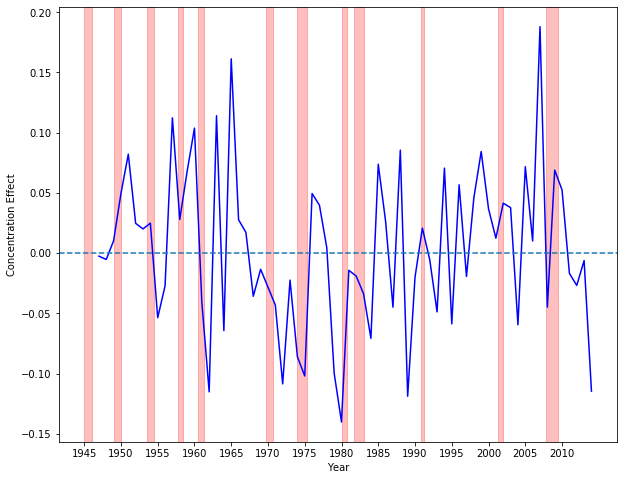

In [65]:
tmp = data.groupby(by = ['year']).apply(lambda x: 
                    np.corrcoef(x['predicted_state_errors'].values,x['vec0'])[1,0])
tmp = tmp.reset_index()
tmp.rename(columns = {0:'inner_prod'},inplace = True)

fig,ax = plt.subplots(figsize = (10,8))
ax.plot(tmp.year[0:],tmp.inner_prod[0:],color = 'blue')

ax.axhline(y = 0,linestyle = '--')
#ax.plot(range(1947,2020),[0]*len(range(1947,2020)),linestyle = 'dashed')
ax.set_xticks(range(1940,2014,5))

ax.set_xlabel("Year")
ax.set_ylabel("Concentration Effect")
ax = shadow_adverse_shocks(ax,x_lim = [1940,2018])

In [22]:
def shadow_adverse_shocks(ax,x_lim):
    
    """
    
    ax - an axes object to shadow
    
    x_lim - the periods with shadowned regions 
    """
    # define the shadow region 
    
    peak = [1930,1937.5,1945,1949,1953.5,1957.75,1960.5,1969.75,1974,1980,1981.75,1990.75,2001.25,2007.75]
    trough = [1933.25,1938.5,1946,1950,1954.5,1958.5,1961.25,1970.75,1975.25,1980.75,1983,1991.25,2002,2009.5]

    for x1,x2 in zip(peak,trough):
        if (x1 >= x_lim[0])&(x2 <= x_lim[1]):
            ax.axvspan(x1, x2, alpha=0.25, color='red')
    
    ### return a figure instance
    return ax

In [1266]:
tmp = pd.DataFrame(log_cum_data,index = year,columns = naics3)

In [1273]:
tmp[tmp.index == 1962].T

1962
111  0.047240
112  0.026423
113 -0.013846
115  0.032777
211  1.193487
212  0.025961
213  0.176524
221 -0.007326
236  0.090190
237  0.232635
238  0.159064
311  0.066666
312  0.095511
313  0.117267
314  0.096787
315  0.117648
316  0.613360
321  0.530477
322  0.102042
323 -0.018810
324  0.039105
325  0.105638
326  0.049751
327  0.032008
331  0.100366
332  0.090977
333  0.085560
334  0.105607
335  0.049368
336  0.079262
..        ...
511  0.054671
512  0.169055
515  0.007235
517  0.023735
518  0.047033
519  0.223650
522  0.034054
523  0.000320
524  0.042902
525  0.043807
531  0.017703
532  0.079392
533  0.029131
541  0.158811
551  0.041658
561  0.170397
562  0.034566
611 -0.005739
621  0.108720
622 -0.039220
623 -0.023016
711  0.165296
712 -0.003729
713 -0.004527
721  0.045140
722 -0.015702
811  0.038045
812  0.057138
813  0.036808
924  0.000000

[88 rows x 1 columns]